# KNN

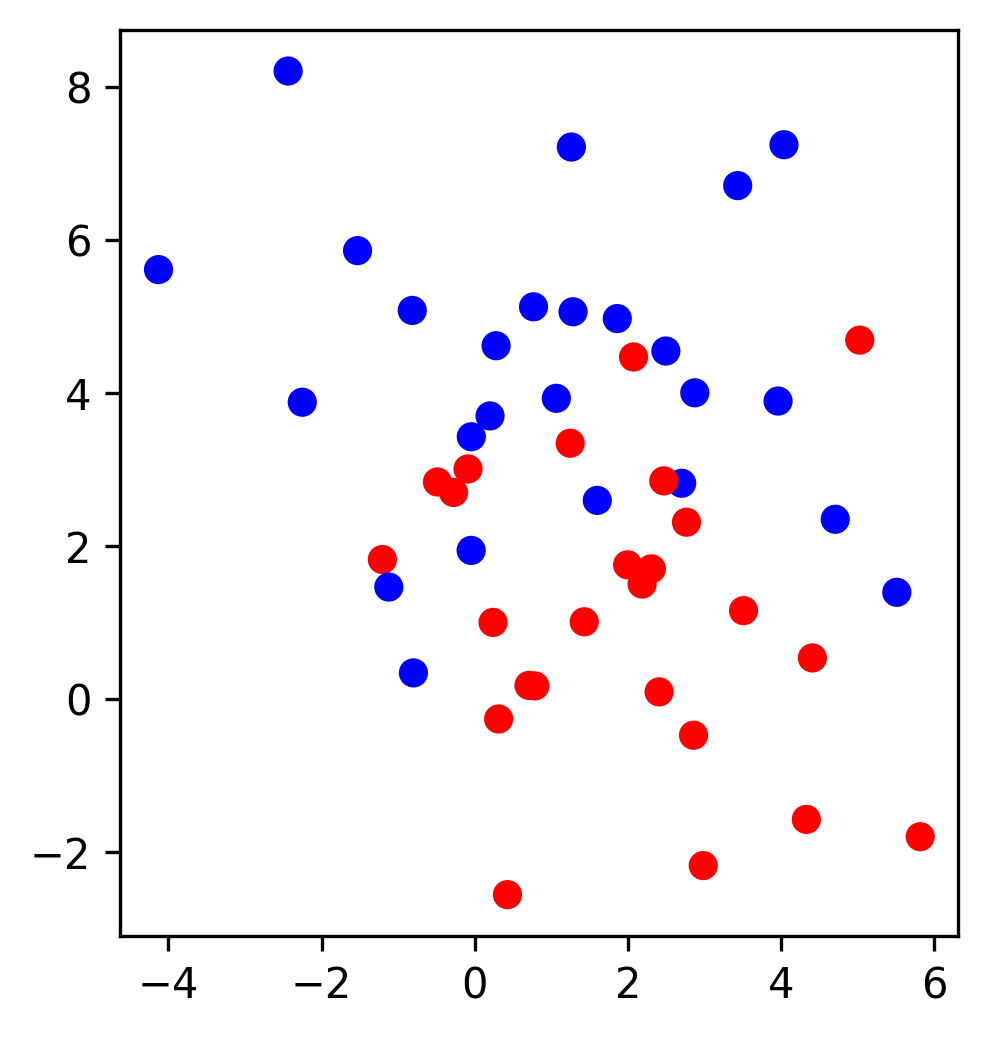

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "300"
plt.rcParams['savefig.bbox'] = "tight"


X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig("images/knn_boundary_dataset.png", bbox_inches='tight')

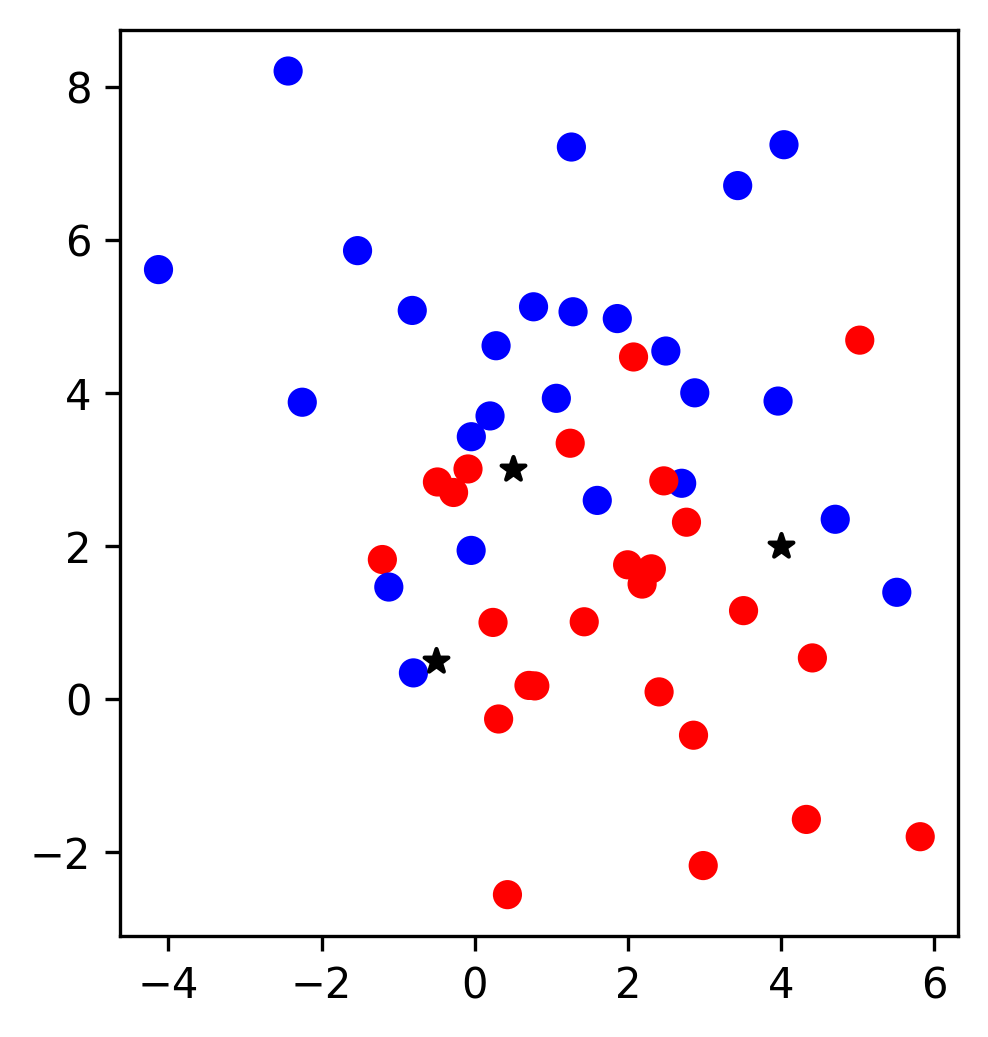

In [3]:
X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])

plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*")
plt.savefig("images/knn_boundary_test_points.png", bbox_inches='tight')

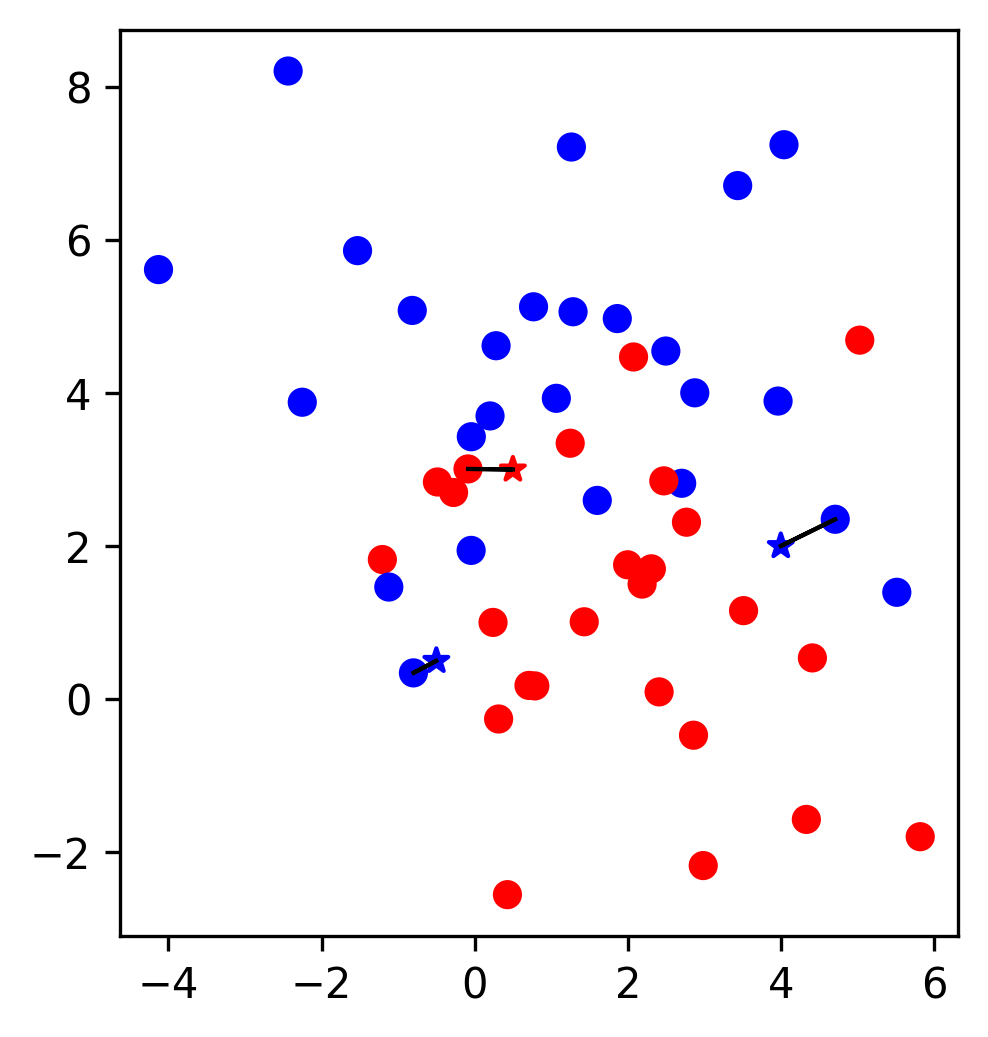

In [4]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure()
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)    
plot_n_neighbors(X, y)
plt.savefig("images/knn_boundary_k1.png", bbox_inches='tight')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"accuracy: {knn.score(X_test, y_test):.2f}")

accuracy: 0.69


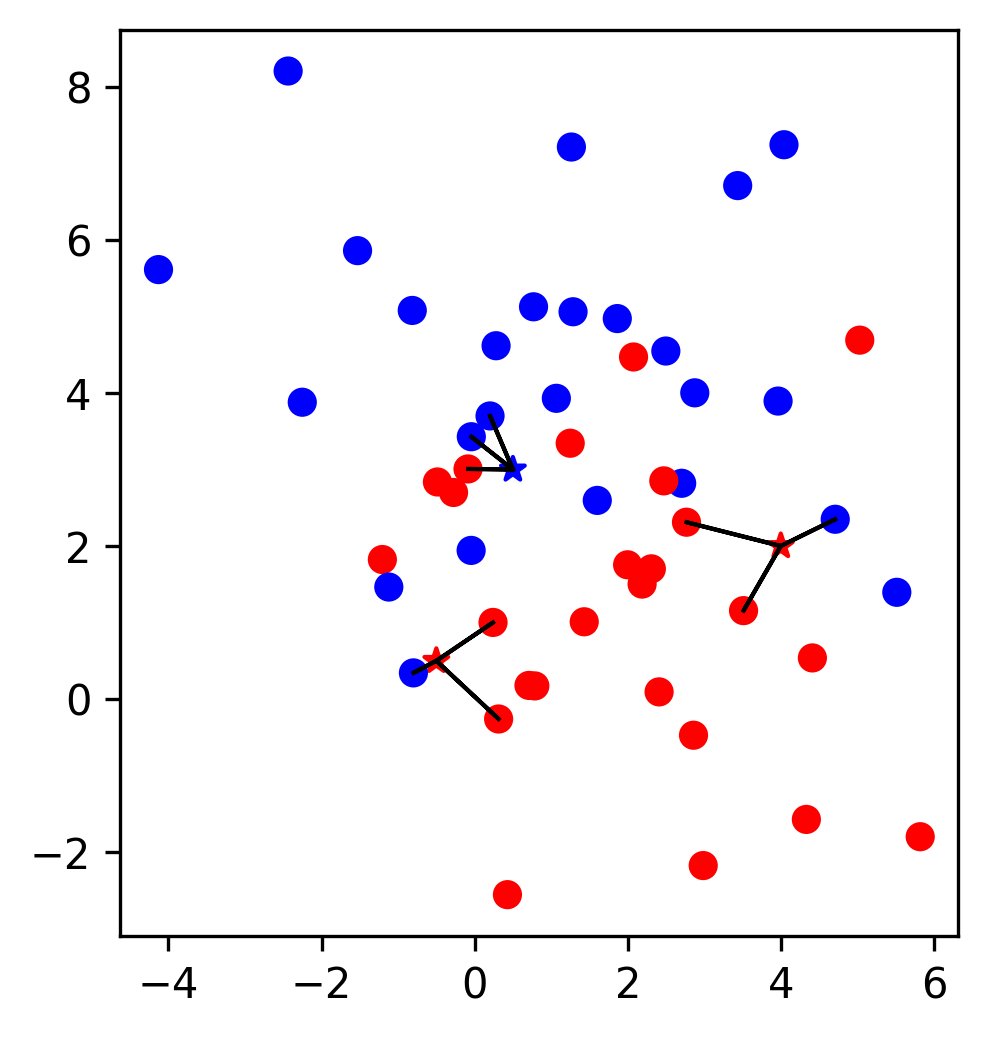

In [6]:
plot_n_neighbors(X, y, n_neighbors=3)
plt.savefig("images/knn_boundary_k3.png", bbox_inches='tight')

In [7]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:                                                                                                              
      eps = X.std() / 2.                                                                                                       

    if ax is None:                                                                                                               
      ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())  

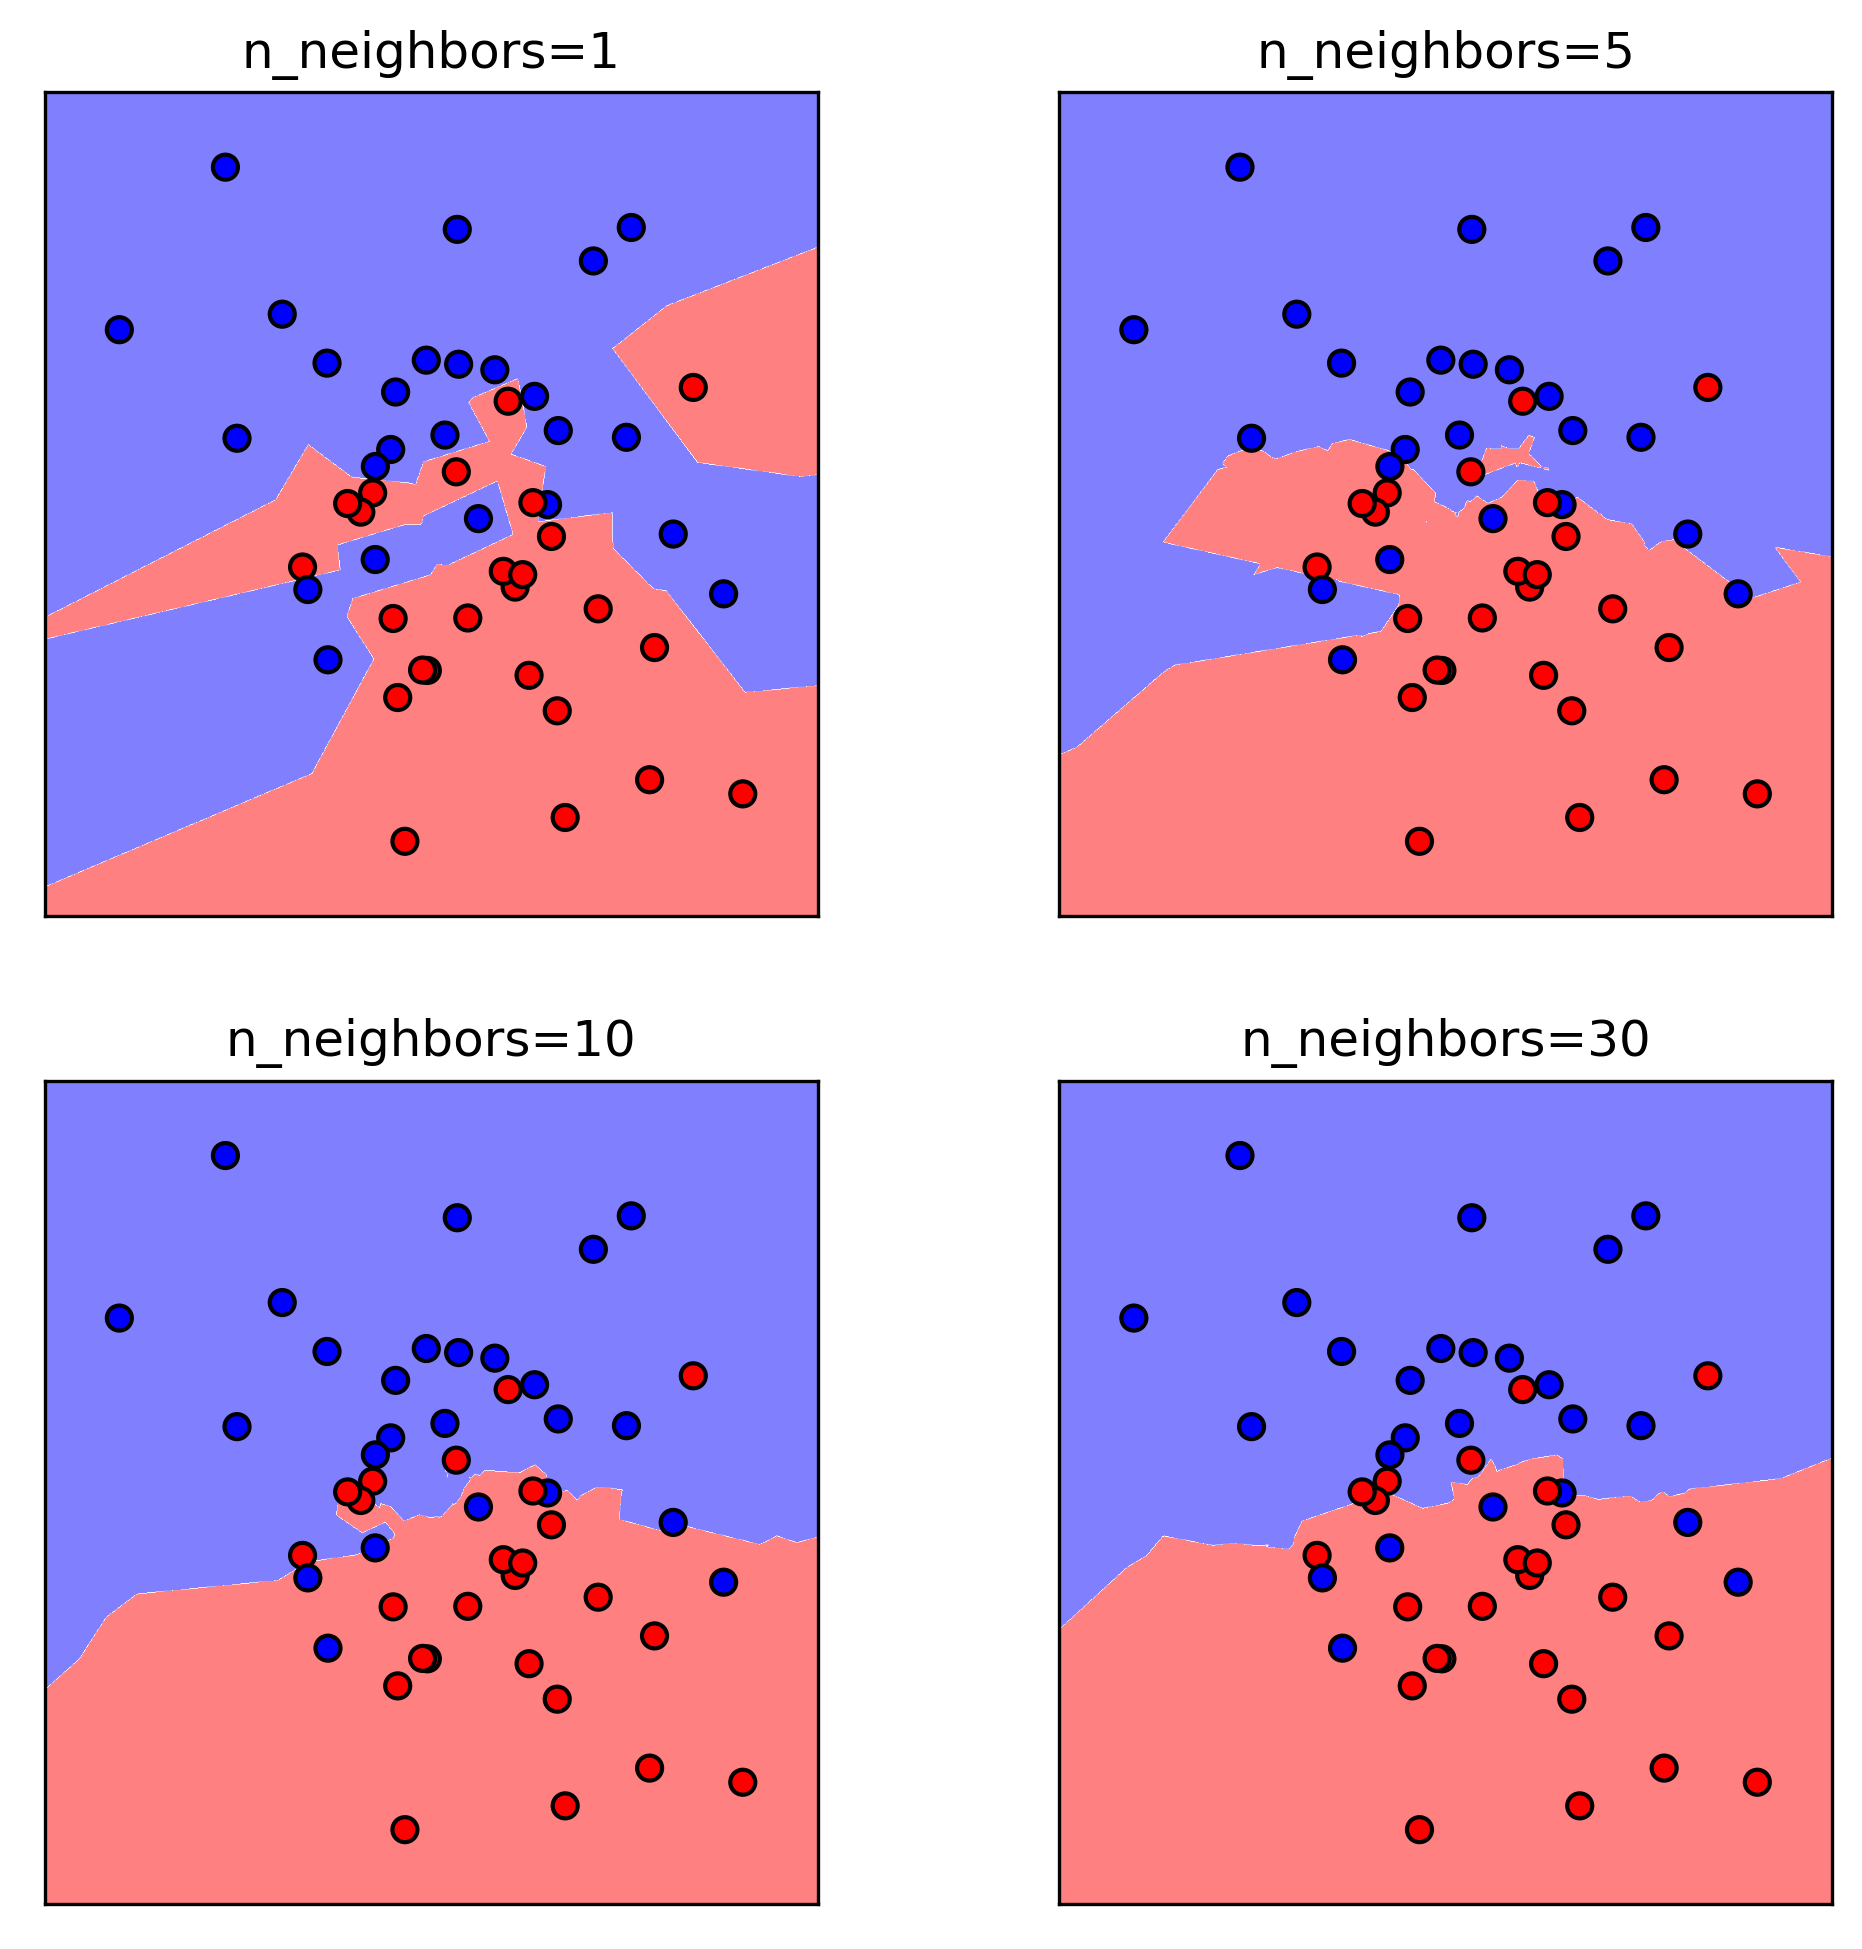

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title(f"n_neighbors={n_neighbors}")
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")
plt.savefig("images/knn_boundary_varying_k.png", bbox_inches='tight')

In [9]:

neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


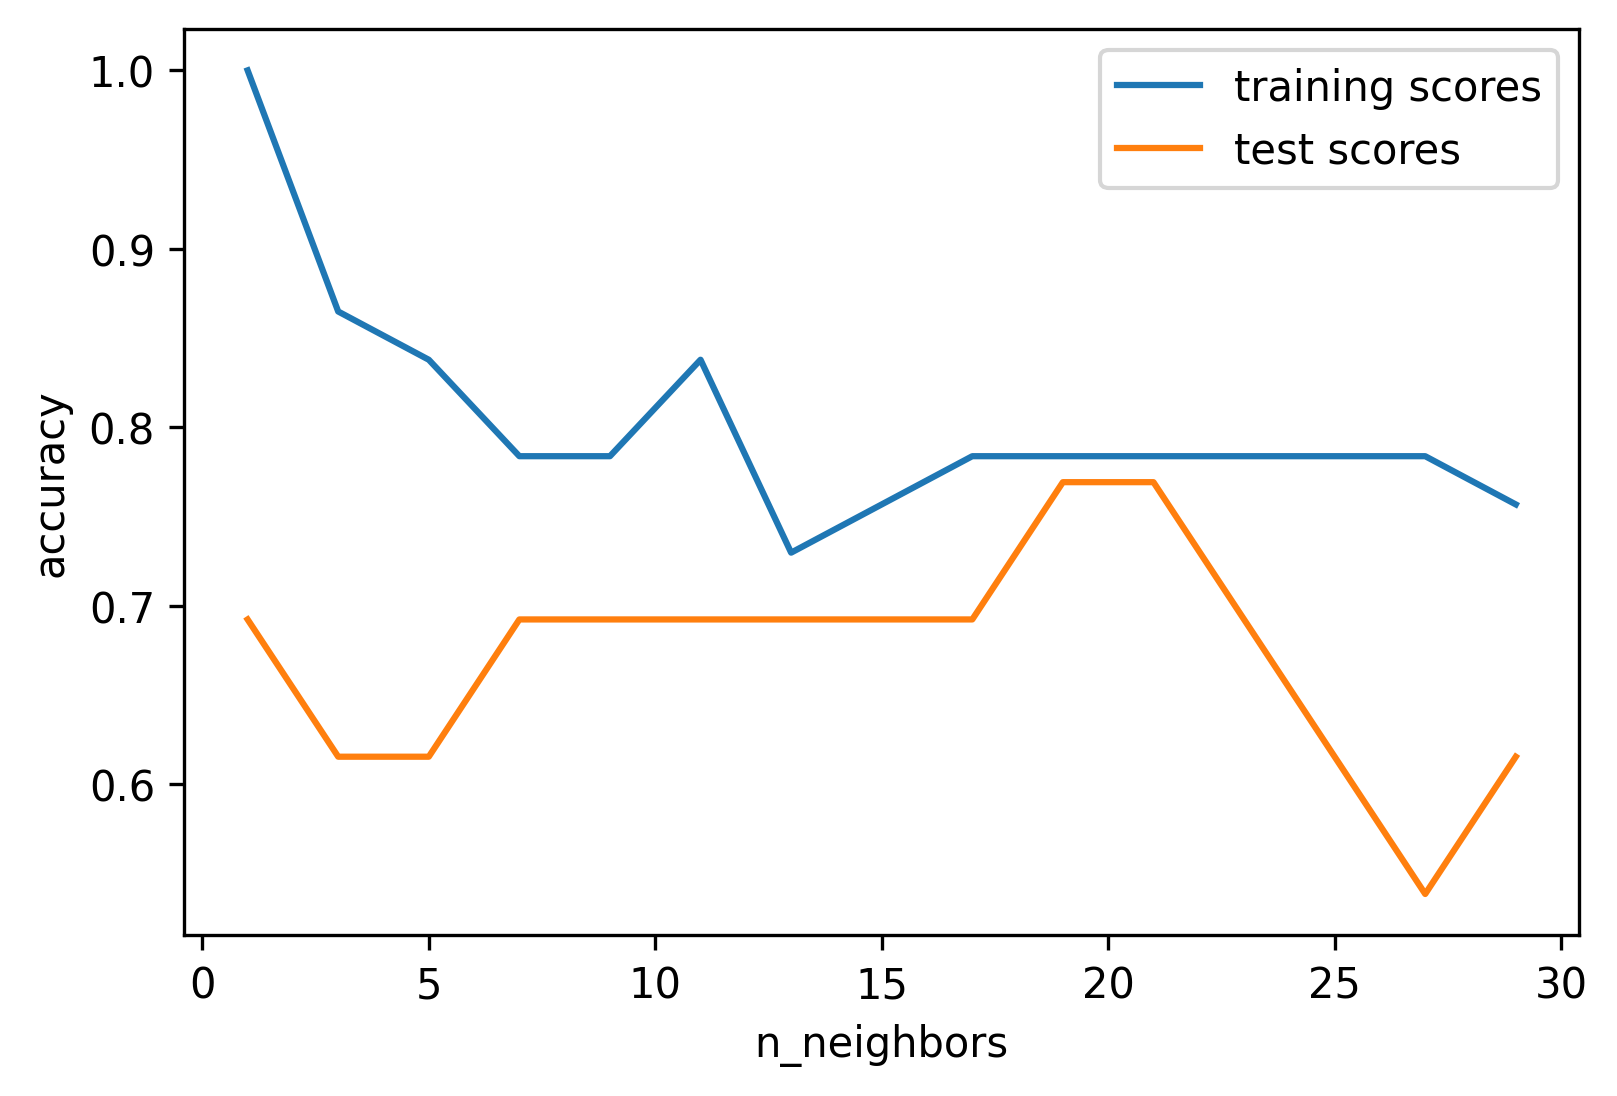

In [10]:
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("images/knn_model_complexity.png", bbox_inches='tight')

# Overfitting the test set

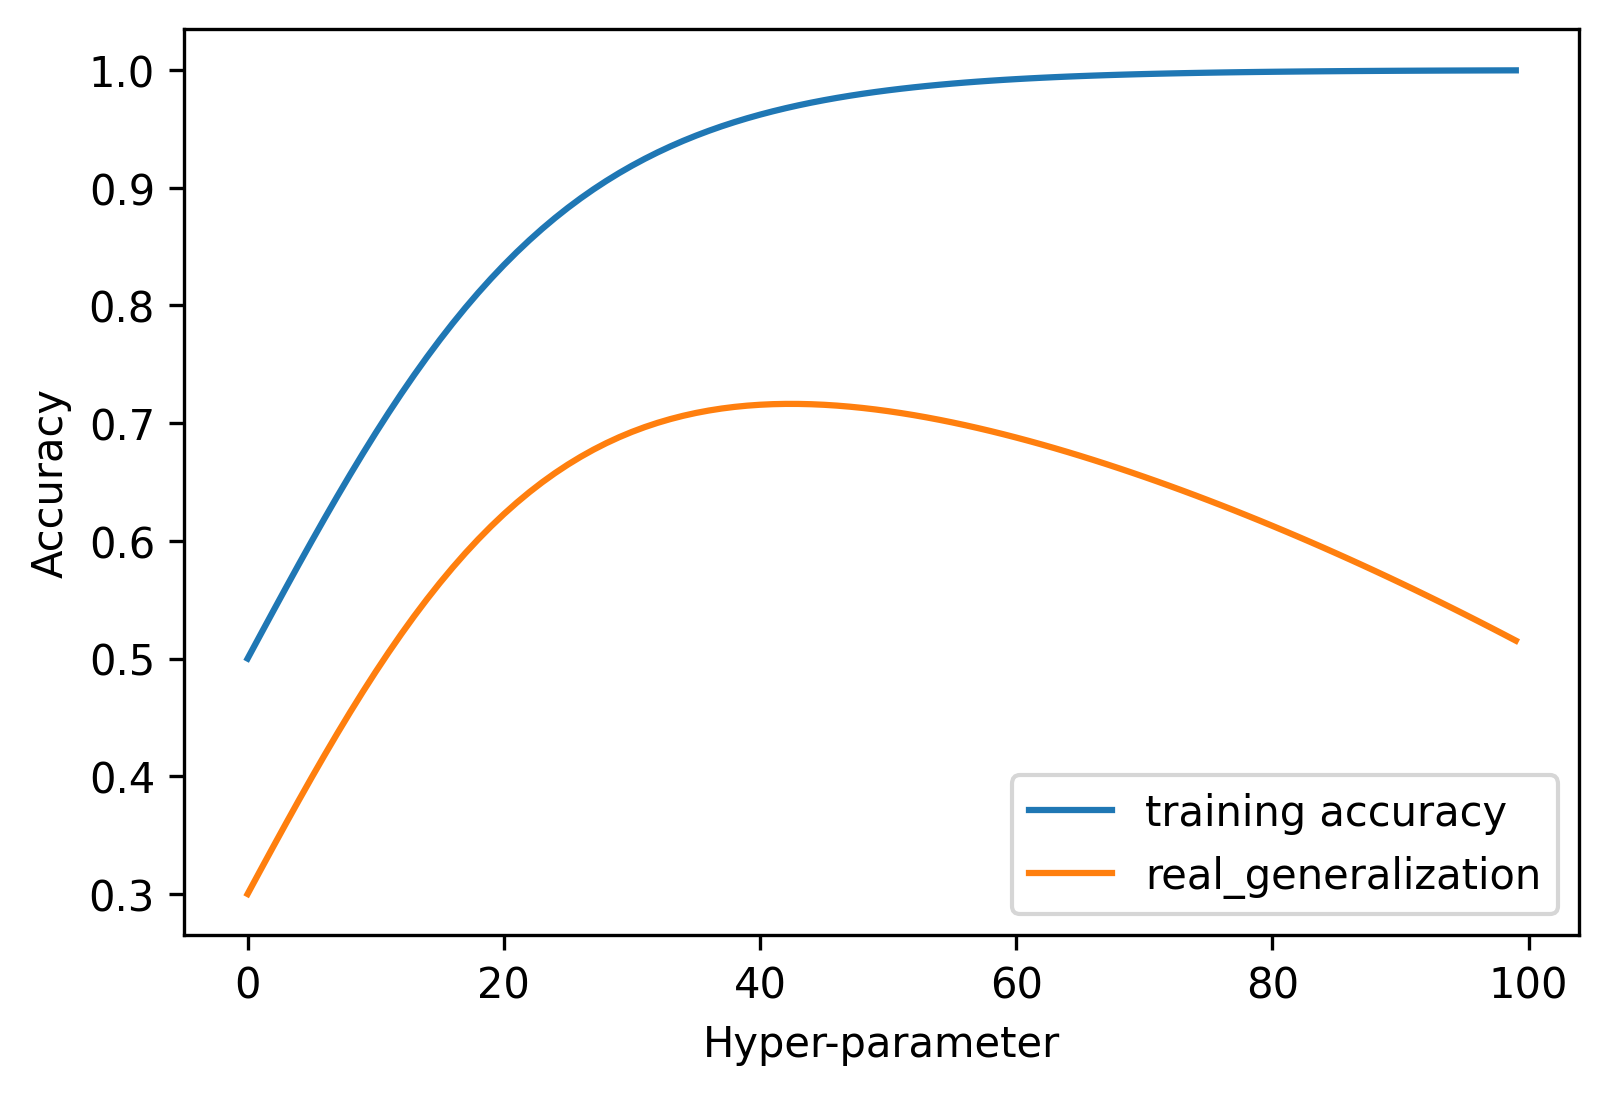

In [11]:
line = np.linspace(0, 8, 100)
train = 1./(1 + np.exp(-line))
plt.plot(train, label='training accuracy')
gen_true = - (line/ 10) ** 2 + (line/10 - .5) ** 3 + 1
gen_true = train - (line/15) ** 2 - .2
plt.plot(gen_true, label="real_generalization")
plt.ylabel("Accuracy")
plt.xlabel("Hyper-parameter")
plt.legend()
plt.savefig("images/overfitting_validation_set_1.png")

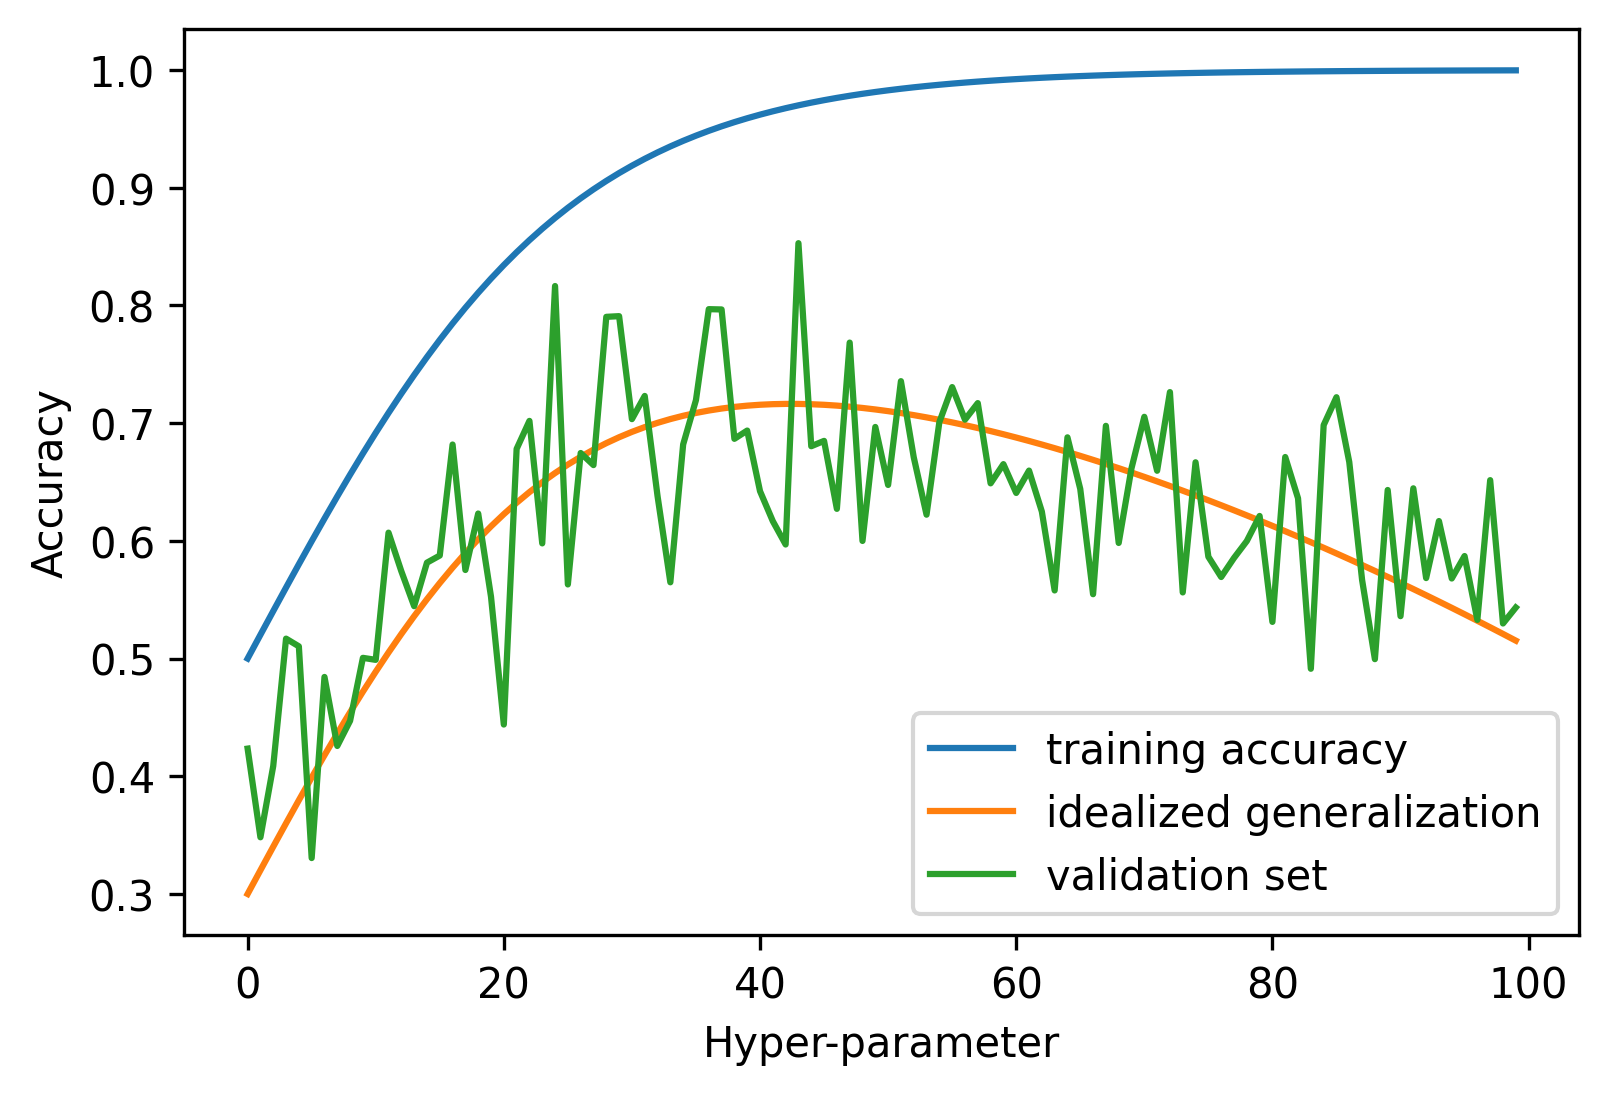

In [12]:
rng = np.random.RandomState(0)
plt.plot(train, label='training accuracy')
plt.plot(gen_true, label="idealized generalization")
validation_set = gen_true + rng.normal(scale=.07, size=100)
plt.plot(validation_set, label="validation set")
plt.ylabel("Accuracy")
plt.xlabel("Hyper-parameter")
plt.legend()
plt.savefig("images/overfitting_validation_set_2.png")

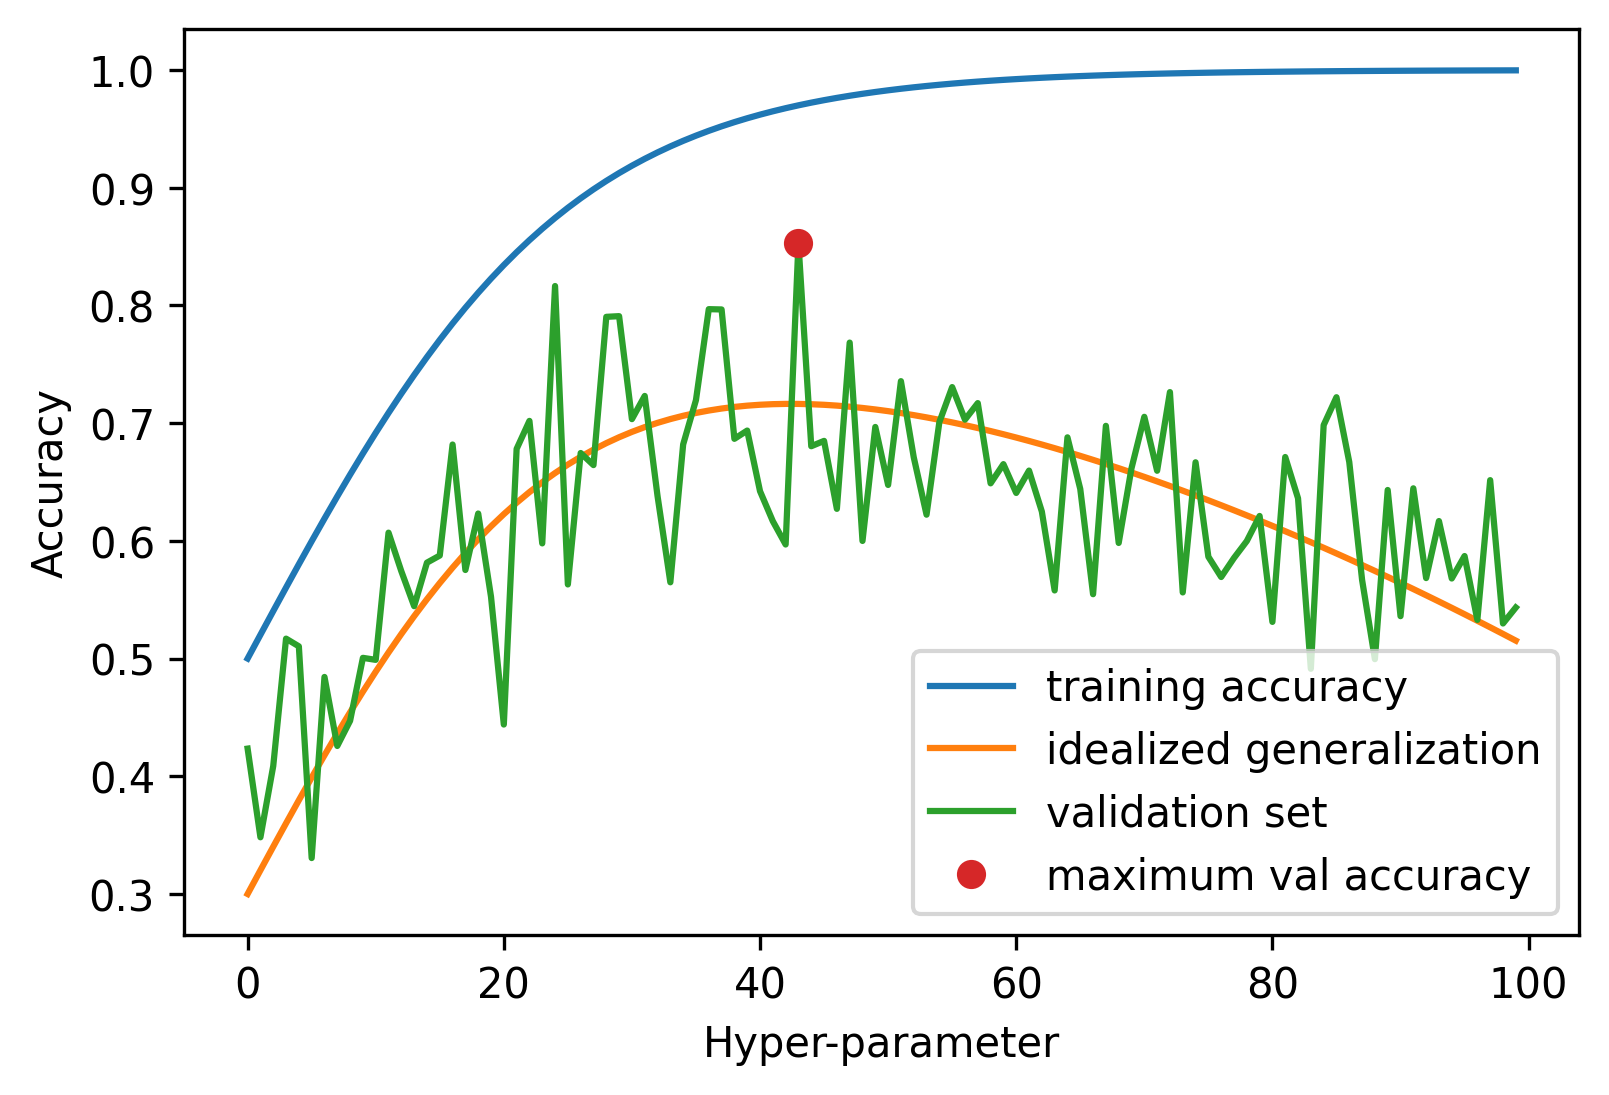

In [13]:
plt.plot(train, label='training accuracy')
plt.plot(gen_true, label="idealized generalization")
optimum = np.argmax(validation_set)
plt.plot(validation_set, label="validation set")
plt.plot([optimum], [validation_set[optimum]], 'o', label="maximum val accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Hyper-parameter")
plt.legend(loc="lower right")
plt.savefig("images/overfitting_validation_set_3.png")

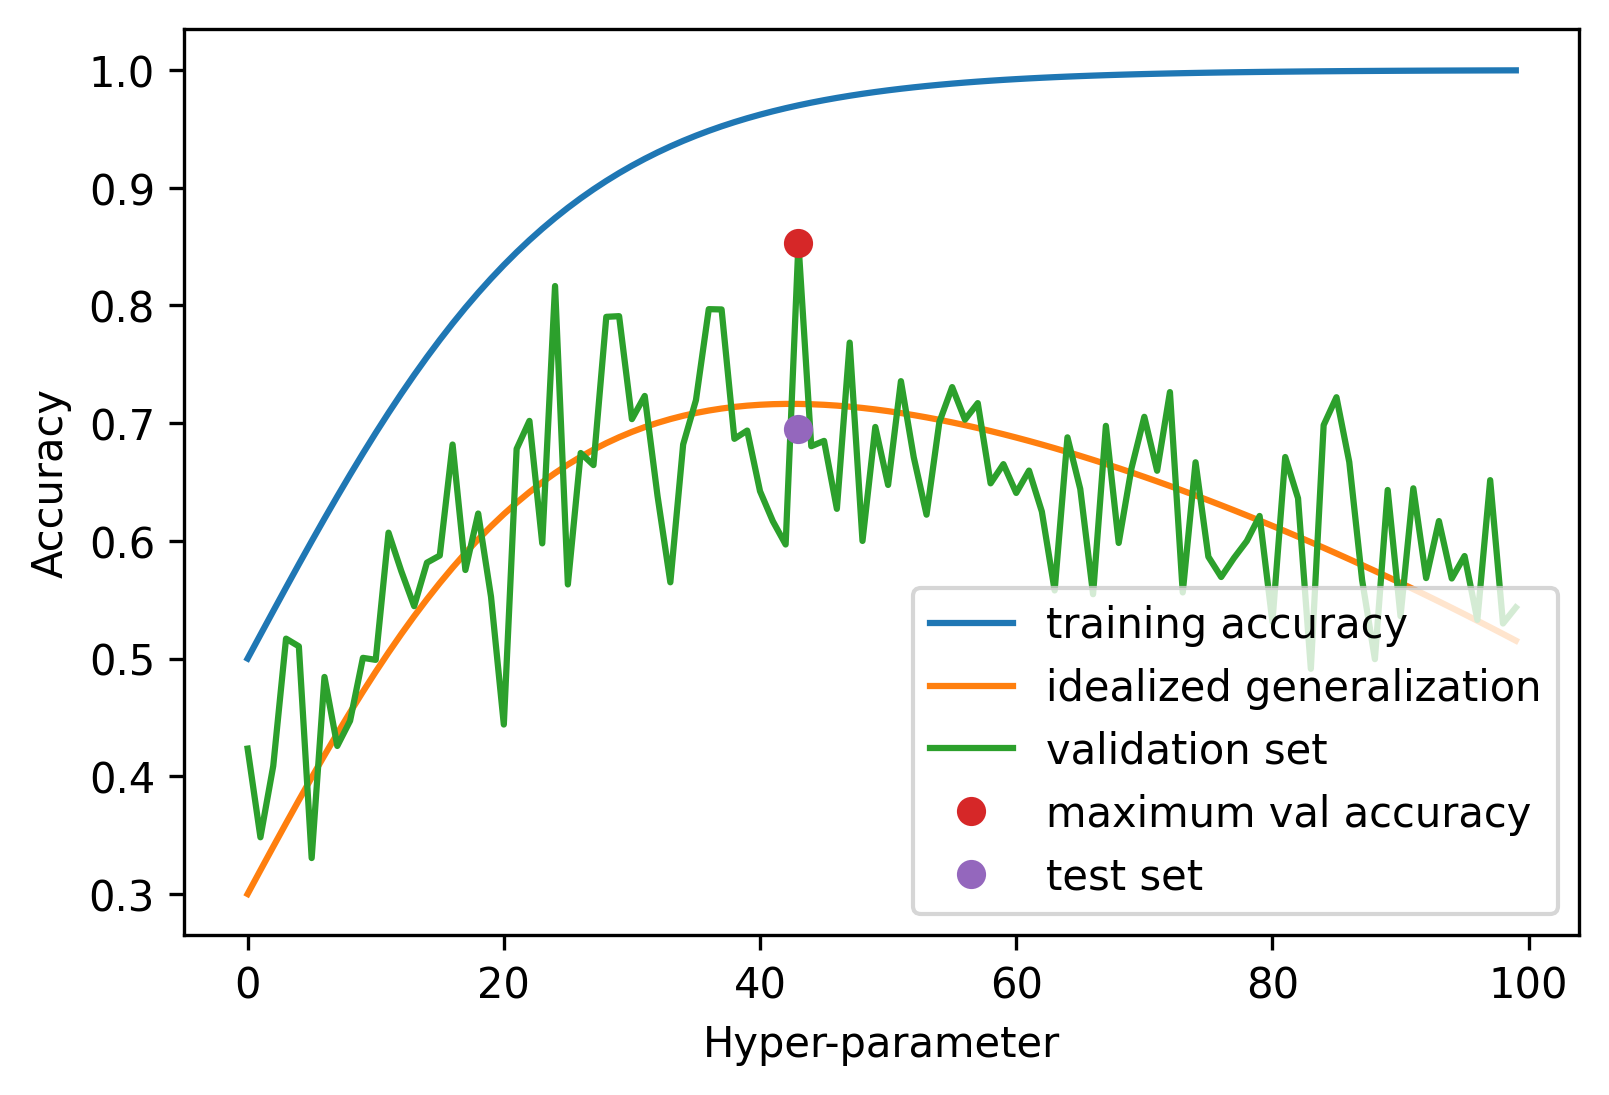

In [14]:
rng = np.random.RandomState(42)
plt.plot(train, label='training accuracy')
plt.plot(gen_true, label="idealized generalization")
optimum = np.argmax(validation_set)
plt.plot(validation_set, label="validation set")
plt.plot([optimum], [validation_set[optimum]], 'o', label="maximum val accuracy")
# draw new independent noise
test_set = gen_true + rng.normal(scale=.07, size=100)
plt.plot([optimum], [test_set[optimum]], 'o', label="test set")
plt.ylabel("Accuracy")
plt.xlabel("Hyper-parameter")
plt.legend(loc="lower right")
plt.savefig("images/overfitting_validation_set_4.png")

# Cross validation

In [15]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
    
print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")

best cross-validation score: 0.767
best n_neighbors: 3
test-set score: 0.923


In [16]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

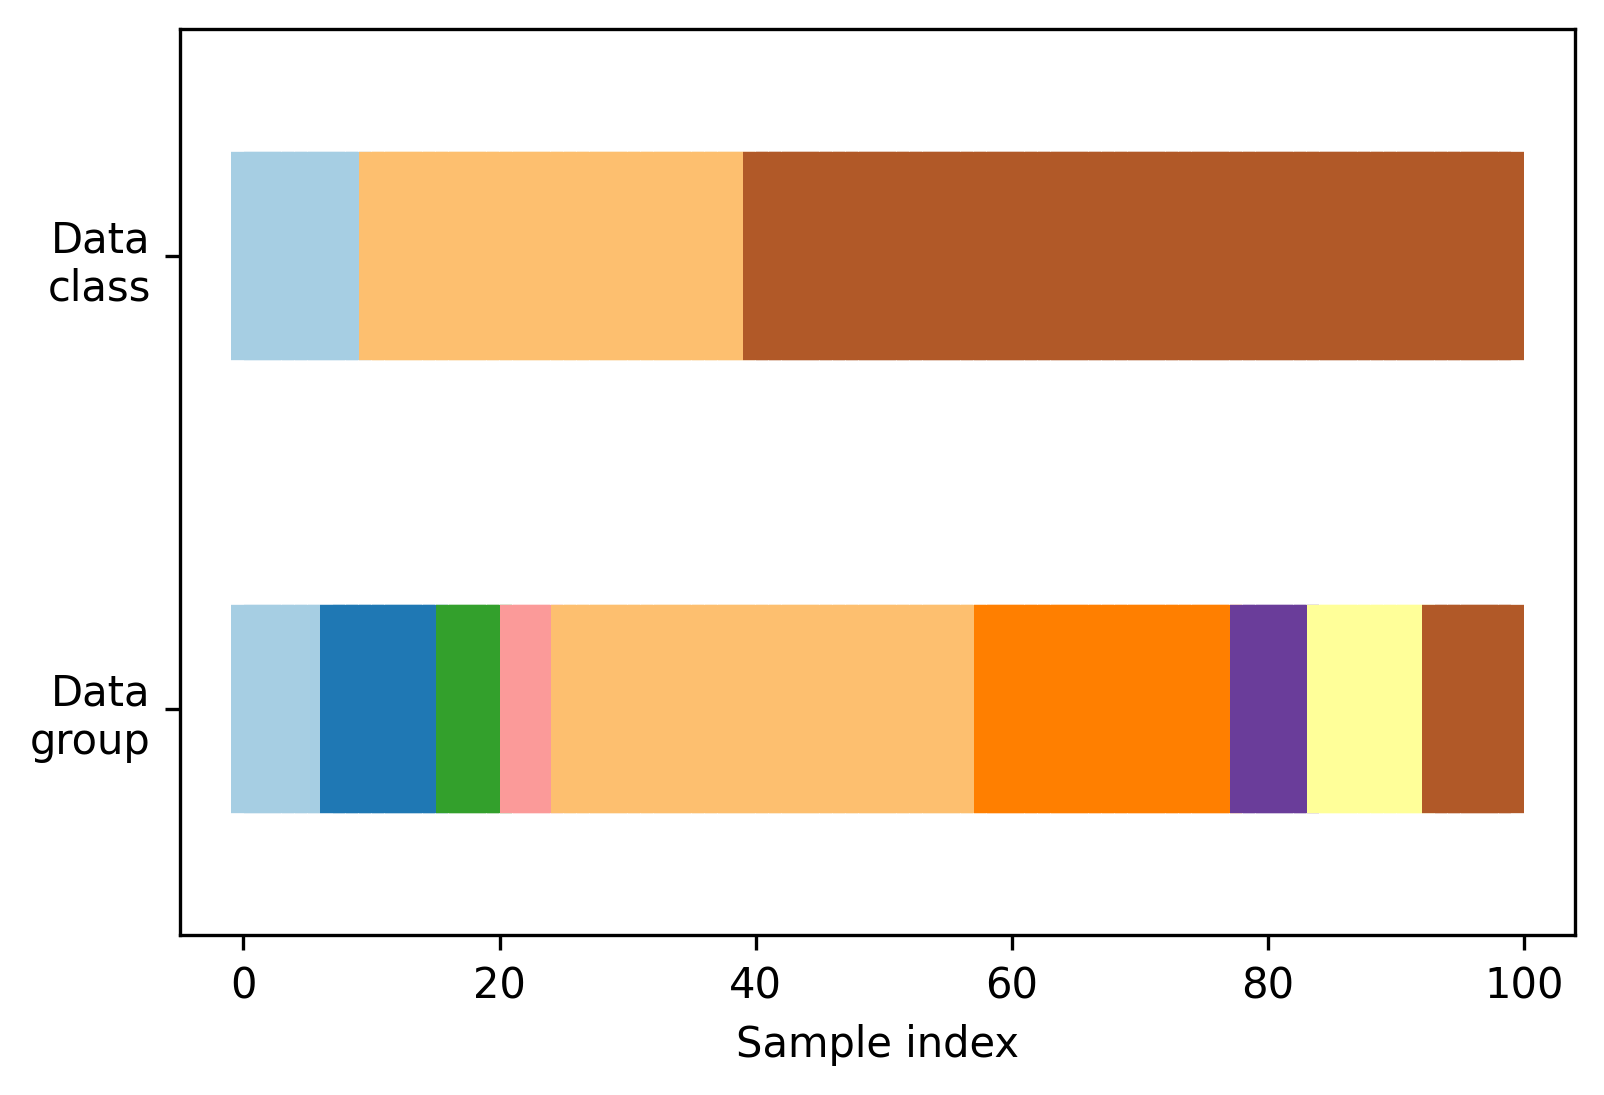

In [17]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
rng = np.random.RandomState(42)
group_prior = rng.dirichlet([2]*10)
rng.multinomial(100, group_prior)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')


In [18]:
def plot_cv_indices(cv, X, y, group, ax, lw=2, show_groups=False, s=700, legend=True):
    """Create a sample plot for indices of a cross-validation object."""
    n_splits = cv.get_n_splits(X, y, group)

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter([n_splits - ii - 1] * len(indices), range(len(indices)),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2, s=s)

    # Plot the data classes and groups at the end
    ax.scatter([-1] * len(X), range(len(X)), 
               c=y, marker='_', lw=lw, cmap=cmap_data, s=s)
    yticklabels = ['class'] + list(range(1, n_splits + 1))
    
    if show_groups:
        ax.scatter([-2] * len(X), range(len(X)), 
                   c=group, marker='_', lw=lw, cmap=cmap_data, s=s)
        yticklabels.insert(0, 'group')

    # Formatting
    ax.set(xticks=np.arange(-1 - show_groups, n_splits), xticklabels=yticklabels,
            ylabel='Sample index', xlabel="CV iteration",
            xlim=[-1.5 - show_groups, n_splits+.2], ylim=[-6, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    if legend:
        ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.2))],
                  ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks(())
    return ax

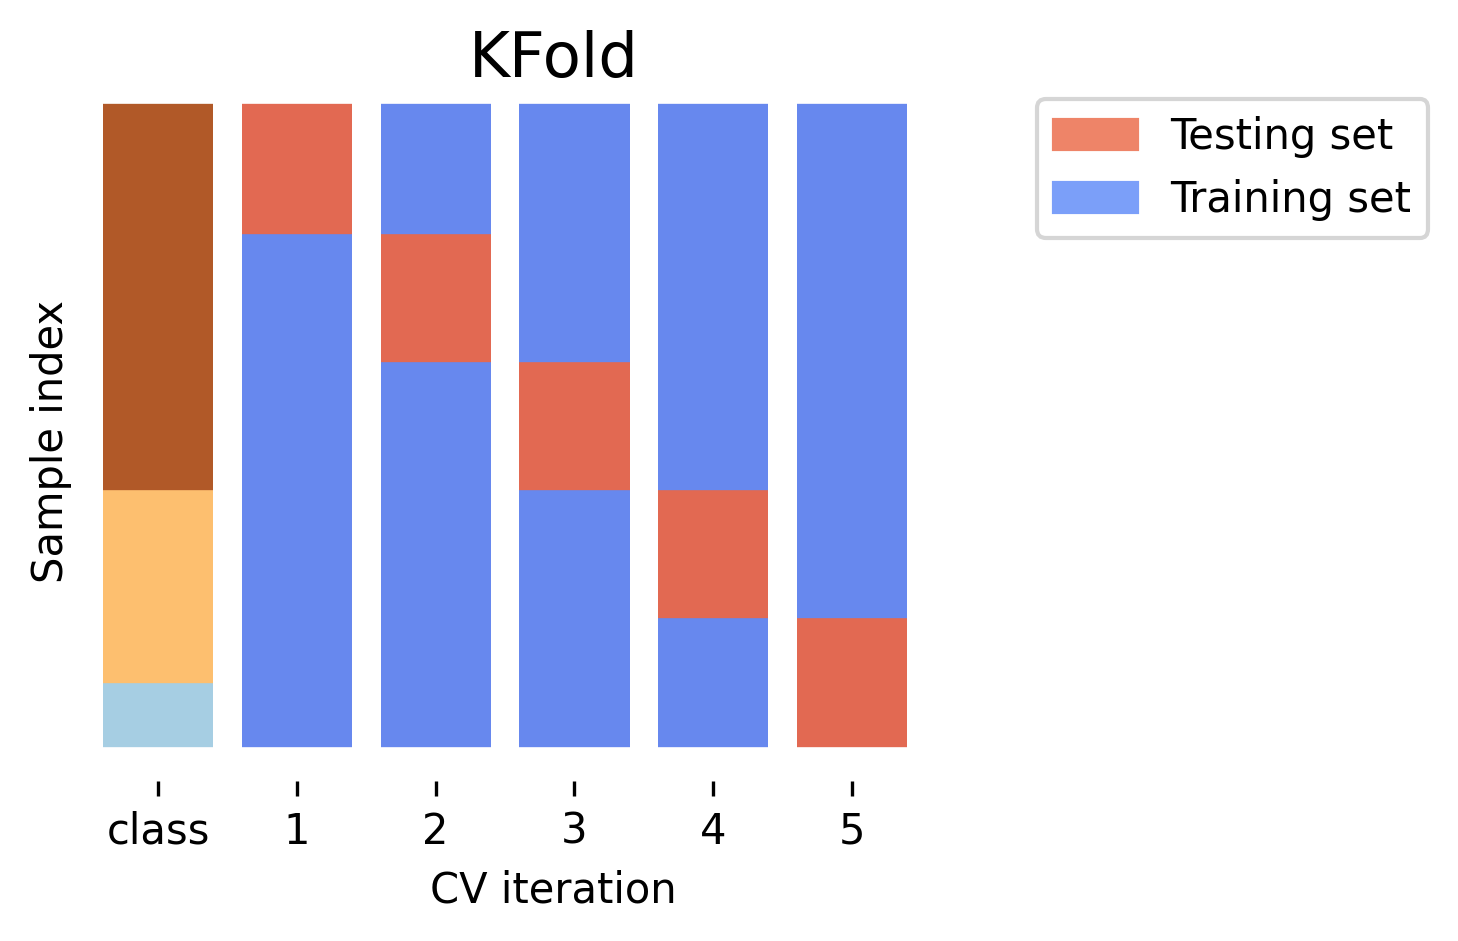

In [19]:
fig, ax = plt.subplots(figsize=(4, 3))
cv = KFold(5)
plot_cv_indices(cv, X, y, groups, ax, s=700)
plt.savefig("images/kfold_cv.png")

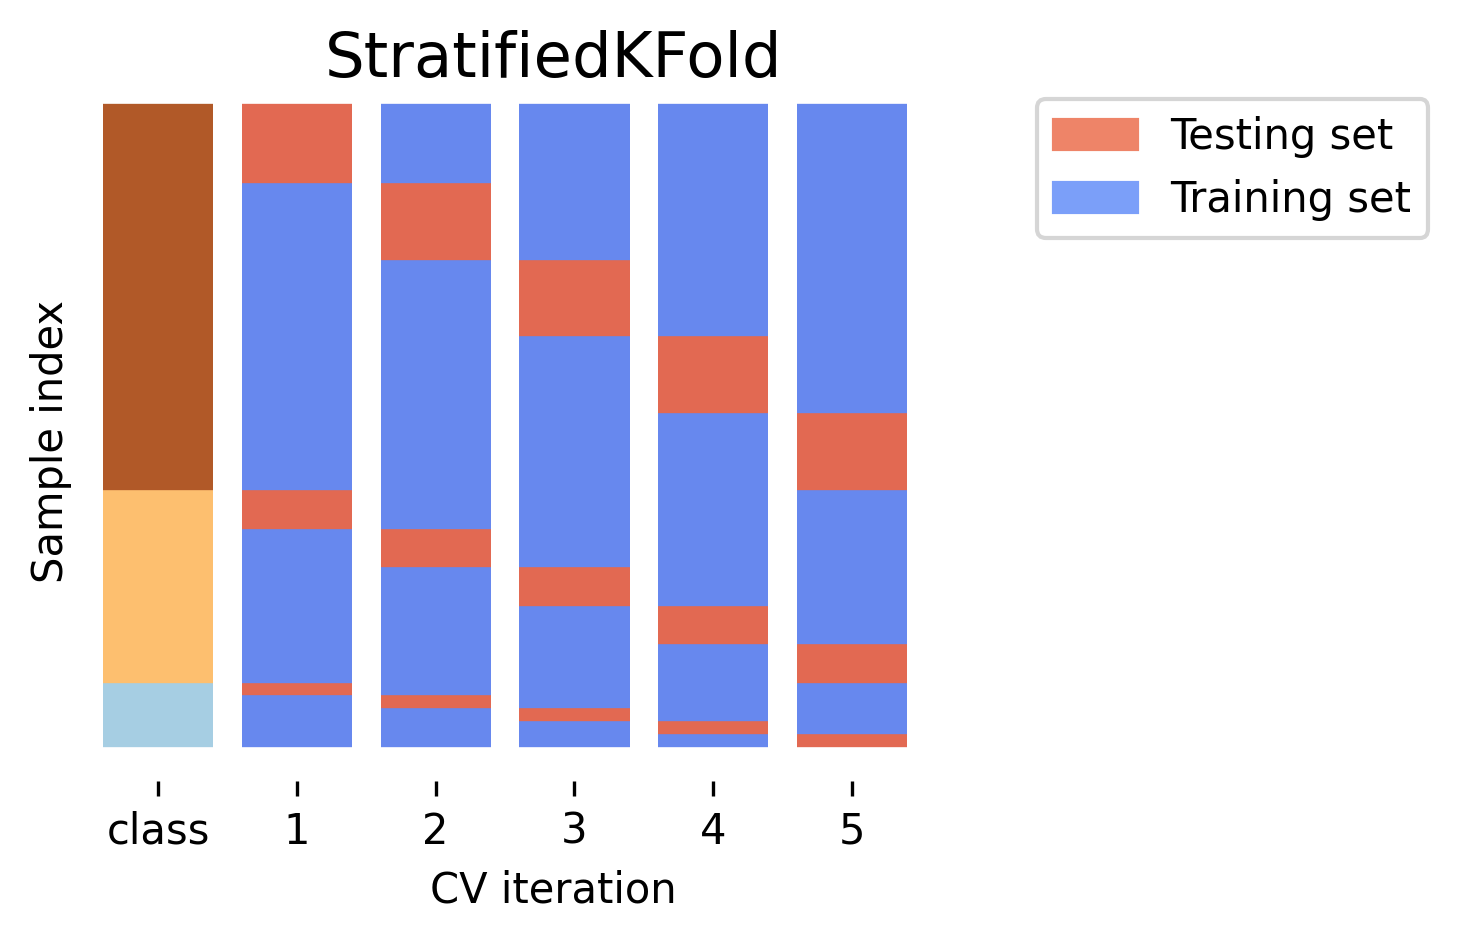

In [20]:
fig, ax = plt.subplots(figsize=(4, 3))
cv = StratifiedKFold(5)
plot_cv_indices(cv, X, y, groups, ax, s=700)
ax.set_ylim((-6, 100))
plt.savefig("images/stratified_cv.png")

# importance of stratification

In [22]:
import pandas as pd
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 2))
y = np.zeros(100, int)
y[:40] = 1
y = pd.Series(y)

In [23]:
y.value_counts()

0    60
1    40
dtype: int64

In [24]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier('most_frequent')

In [25]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold
res = cross_val_score(dc, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True))
np.mean(res), res.std()

(0.6, 0.0)

In [26]:
res = cross_val_score(dc, X, y, cv=KFold(n_splits=5, shuffle=True))
np.mean(res), res.std()

(0.6, 0.14832396974191325)

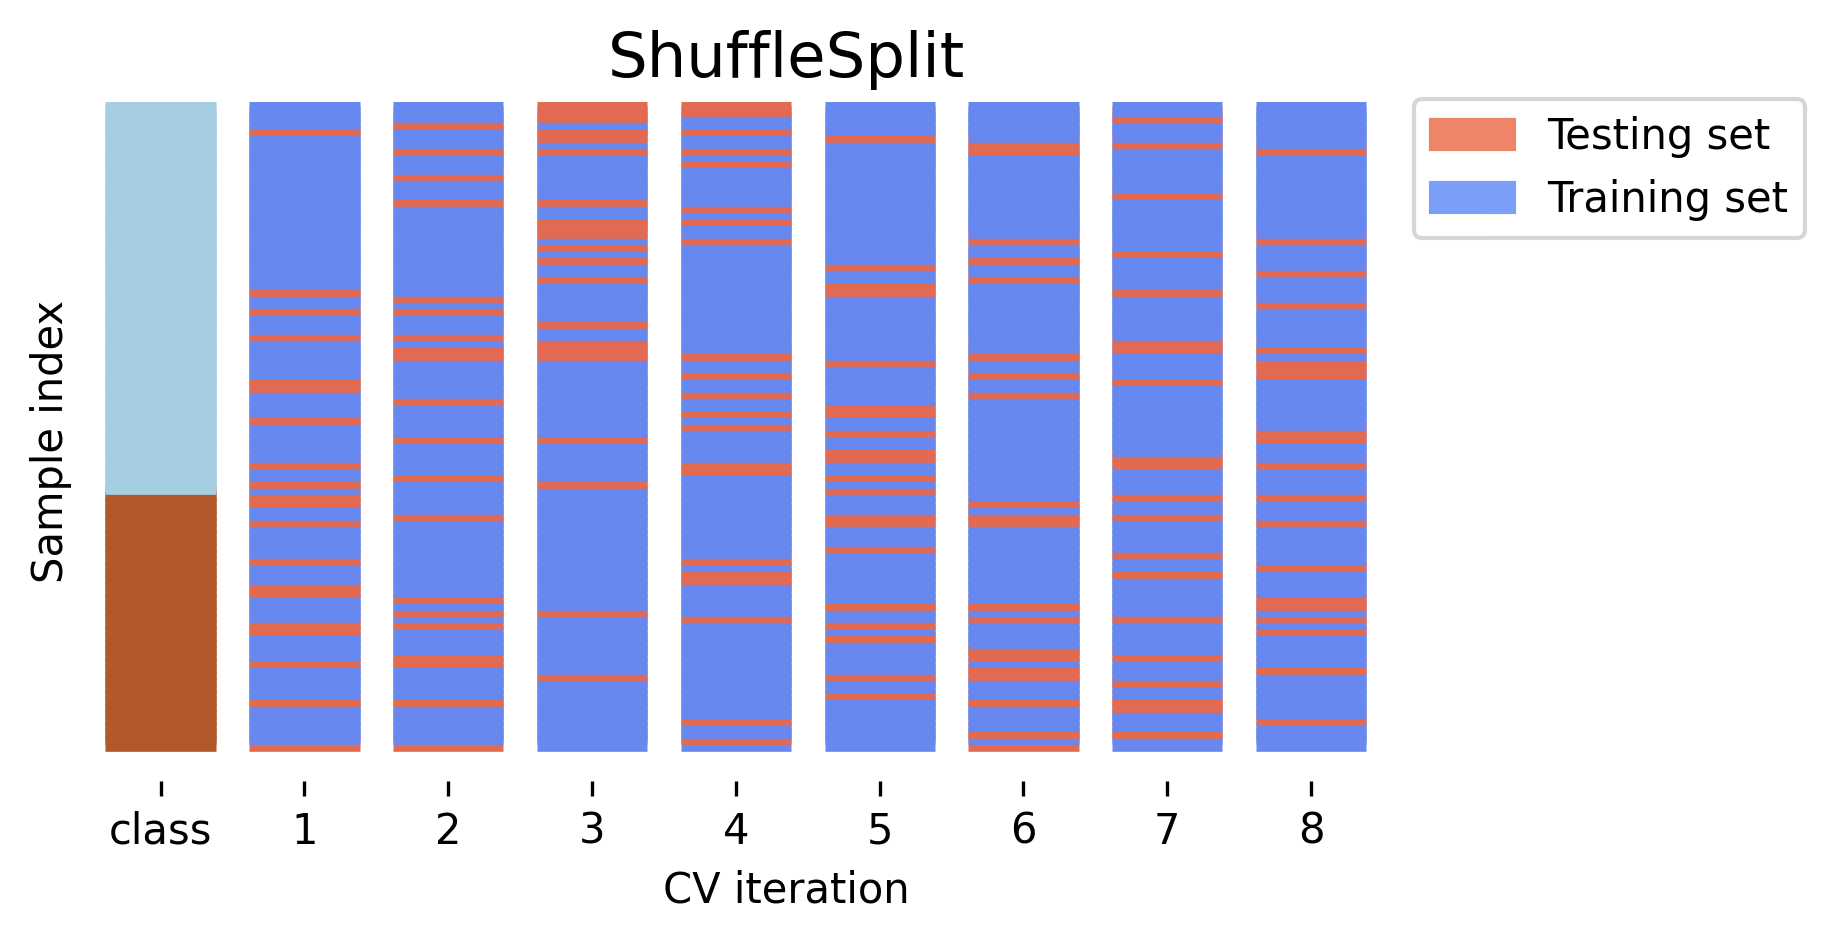

In [27]:
fig, ax = plt.subplots(figsize=(6, 3))
cv = ShuffleSplit(8, test_size=.2)
plot_cv_indices(cv, X, y, groups, ax, n_splits, s=700)
ax.set_ylim((-6, 100))
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.2))],
          ['Testing set', 'Training set'], loc=(.95, .8))
plt.savefig("images/shuffle_split_cv.png")

In [28]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
rng = np.random.RandomState(42)
group_prior = rng.dirichlet([2]*10)
rng.multinomial(100, group_prior)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


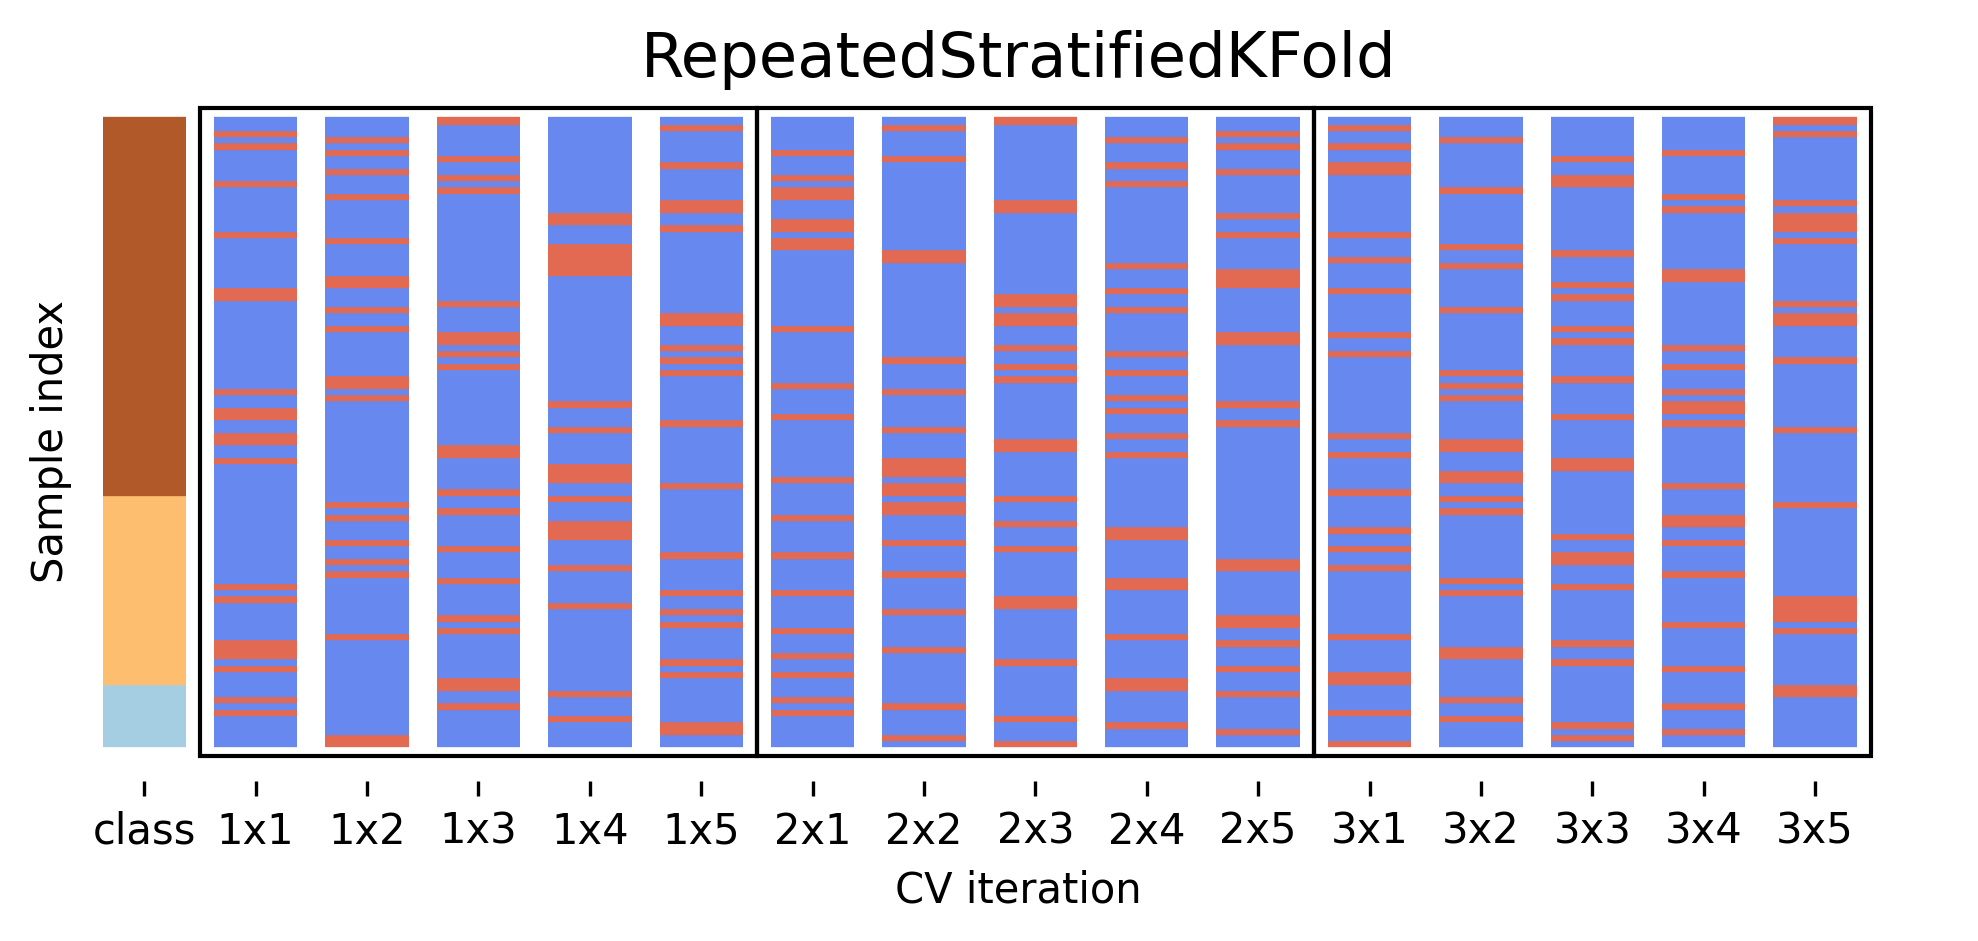

In [29]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(8, 3))
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
plot_cv_indices(cv, X, y, groups, ax, lw=2, s=400, legend=False)
ax.set_ylim((-6, 102))
xticklabels = ["class"] + [f"{repeat}x{split}" for repeat in range(1, 4) for split in range(1, 6)]
ax.set_xticklabels(xticklabels)
for i in range(3):
    rect = Rectangle((-.5 + i * 5, -2.), 5, 103, edgecolor='k', facecolor='none')
    ax.add_artist(rect)


plt.savefig("images/repeated_stratified_kfold.png")

In [30]:
import pandas as pd
approval = pd.read_csv("https://projects.fivethirtyeight.com/trump-approval-data/approval_topline.csv")

In [31]:
approval.columns

Index(['president', 'subgroup', 'modeldate', 'approve_estimate', 'approve_hi',
       'approve_lo', 'disapprove_estimate', 'disapprove_hi', 'disapprove_lo',
       'timestamp'],
      dtype='object')

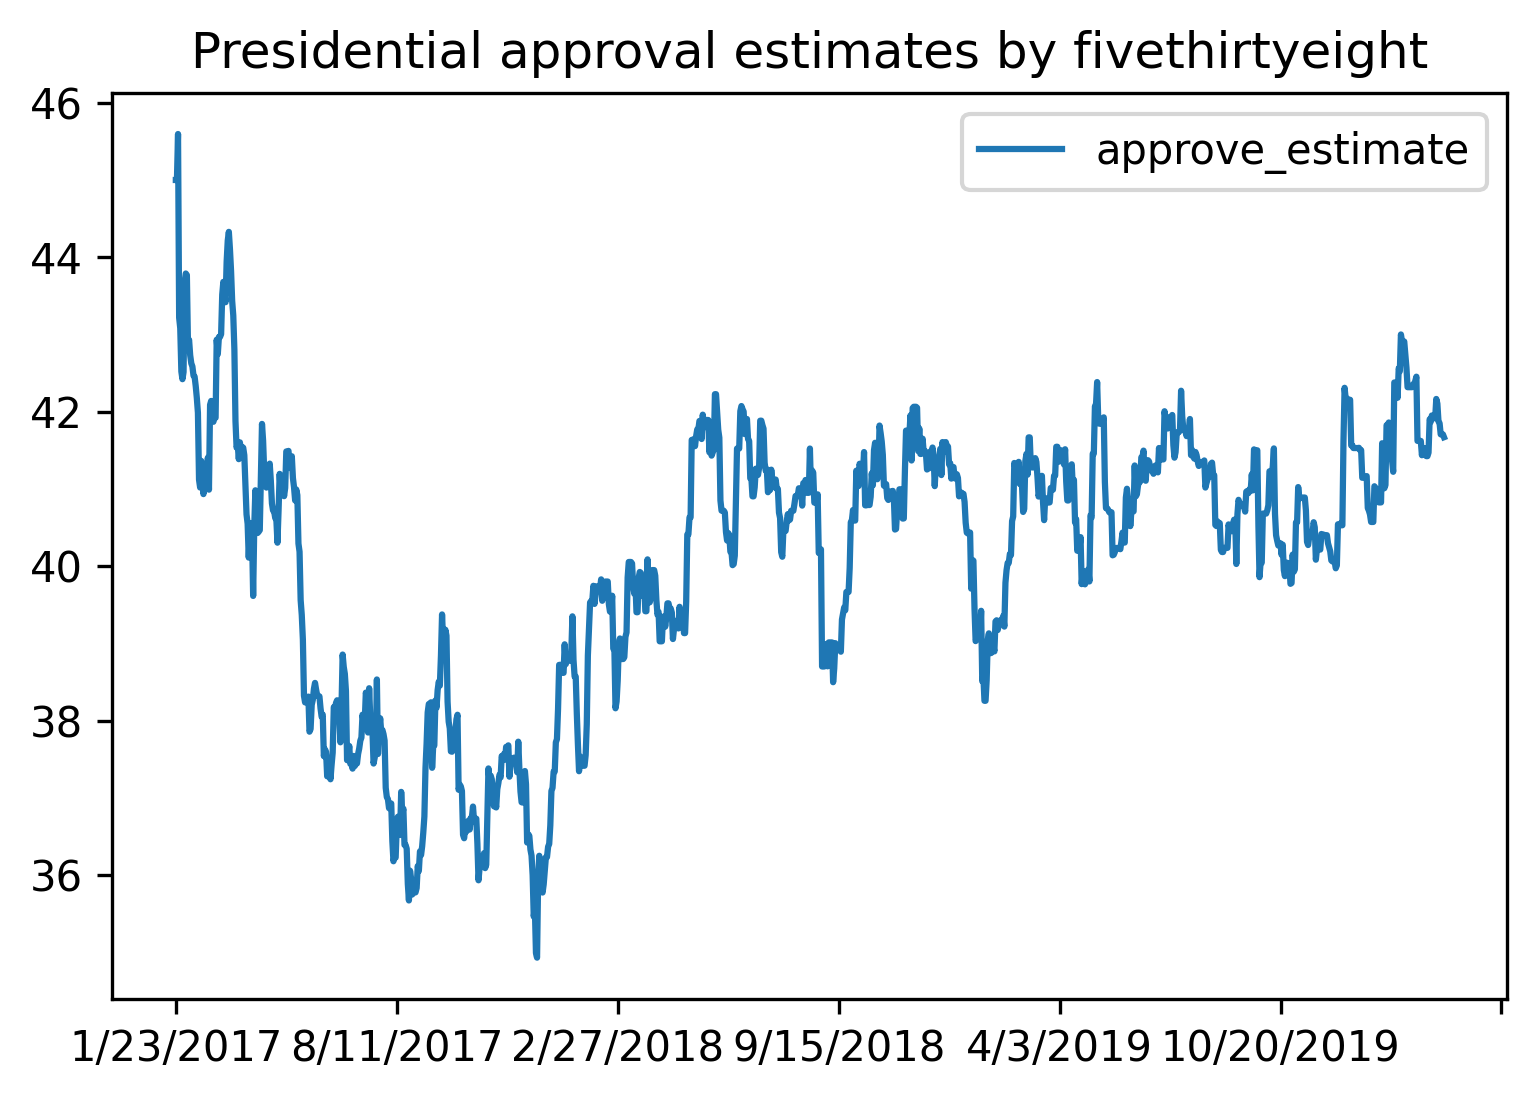

In [32]:
adults = approval.groupby("subgroup").get_group('Adults')
adults = adults.set_index('modeldate')[::-1]
adults.approve_estimate.plot()
plt.title("Presidential approval estimates by fivethirtyeight")
plt.savefig("images/time_series1.png")
ax = plt.gca()
ax.set_xlabel("")
plt.legend()

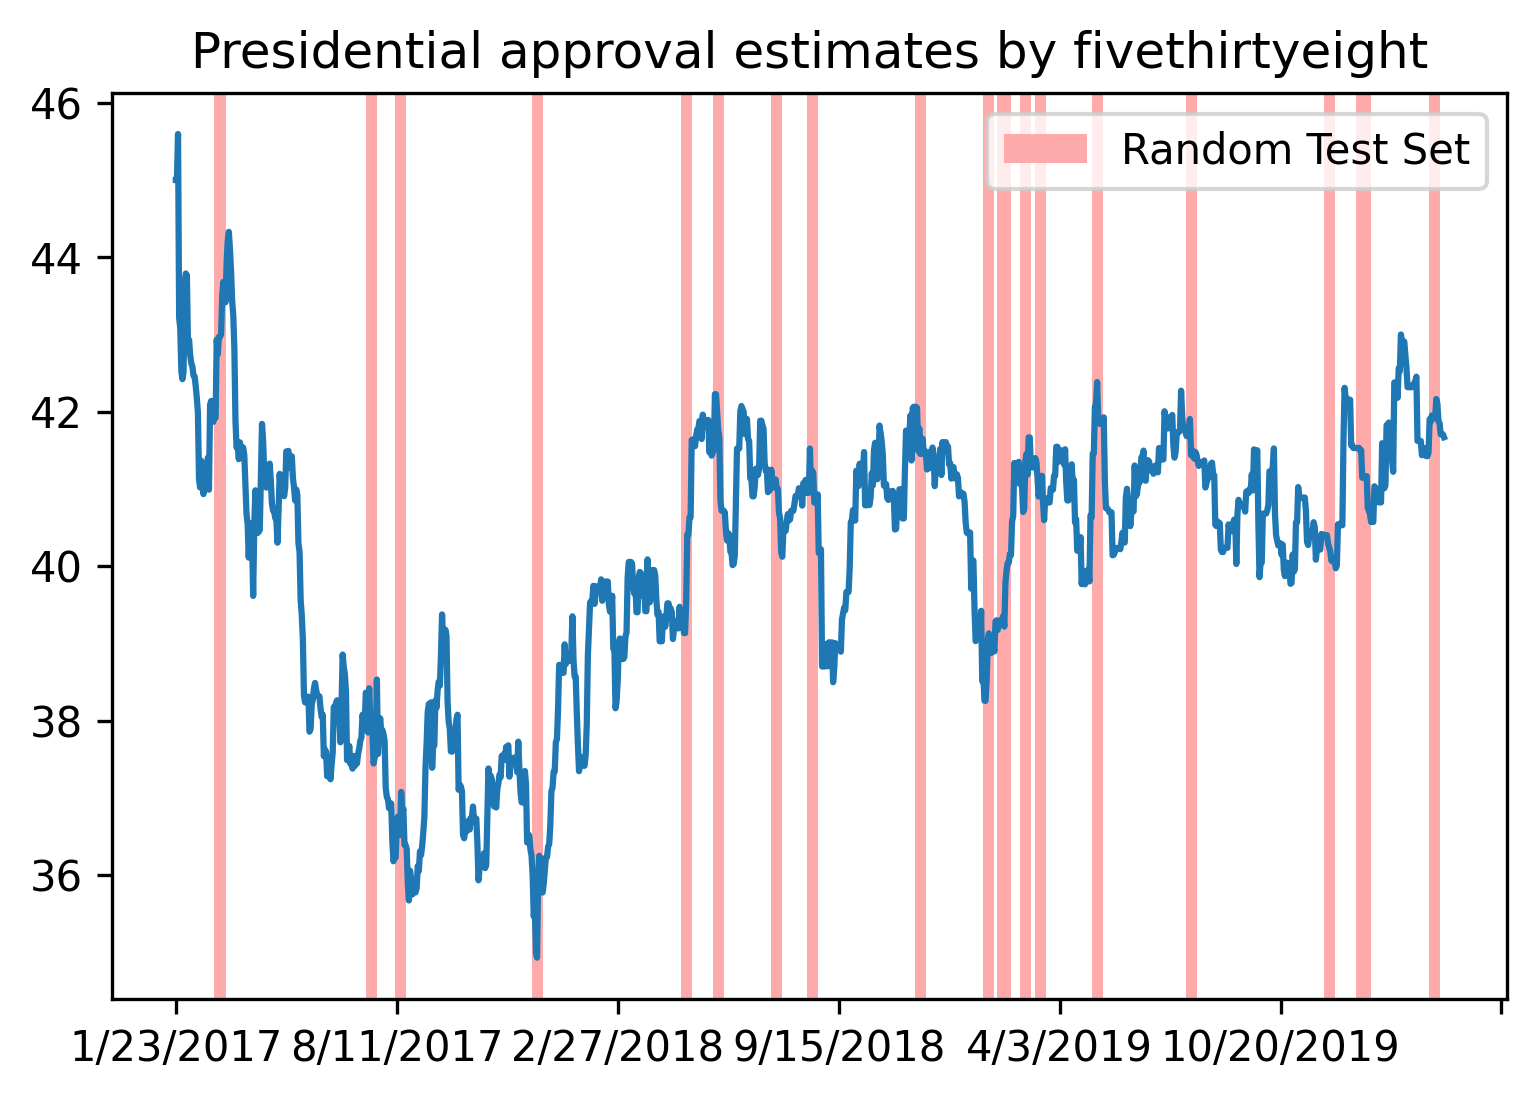

In [33]:
from matplotlib.patches import Rectangle

adults.approve_estimate.plot()

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
for i in range(20):
    rect = Rectangle((np.random.randint(0, xlim[1]), ylim[0]), 10, ylim[1]-ylim[0], facecolor='#FFAAAA')
    ax.add_artist(rect)
plt.title("Presidential approval estimates by fivethirtyeight")
plt.legend([rect], ['Random Test Set'] )
ax.set_xlabel("")
plt.savefig("images/time_series2.png")

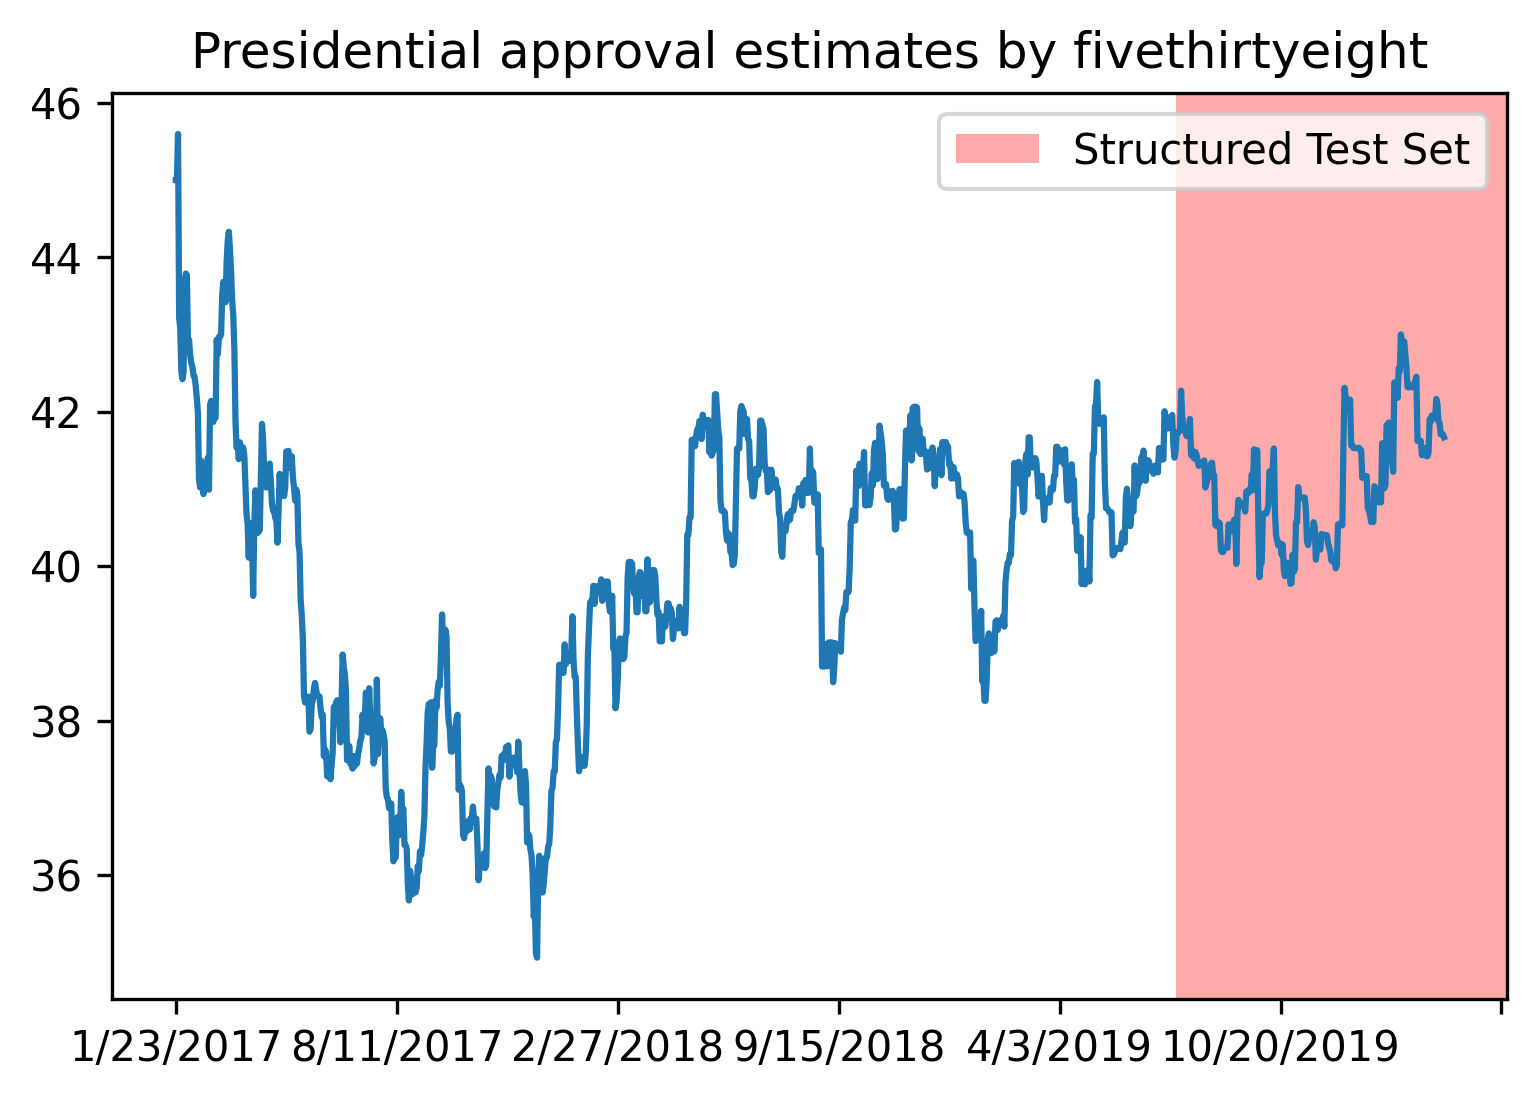

In [34]:
from matplotlib.patches import Rectangle

adults.approve_estimate.plot()

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
rect = Rectangle((xlim[1] - 300, ylim[0]), 300, ylim[1]-ylim[0], facecolor='#FFAAAA')
ax.add_artist(rect)

plt.title("Presidential approval estimates by fivethirtyeight")
plt.legend([rect], ['Structured Test Set'] )
ax.set_xlabel("")
plt.savefig("images/time_series3.png")

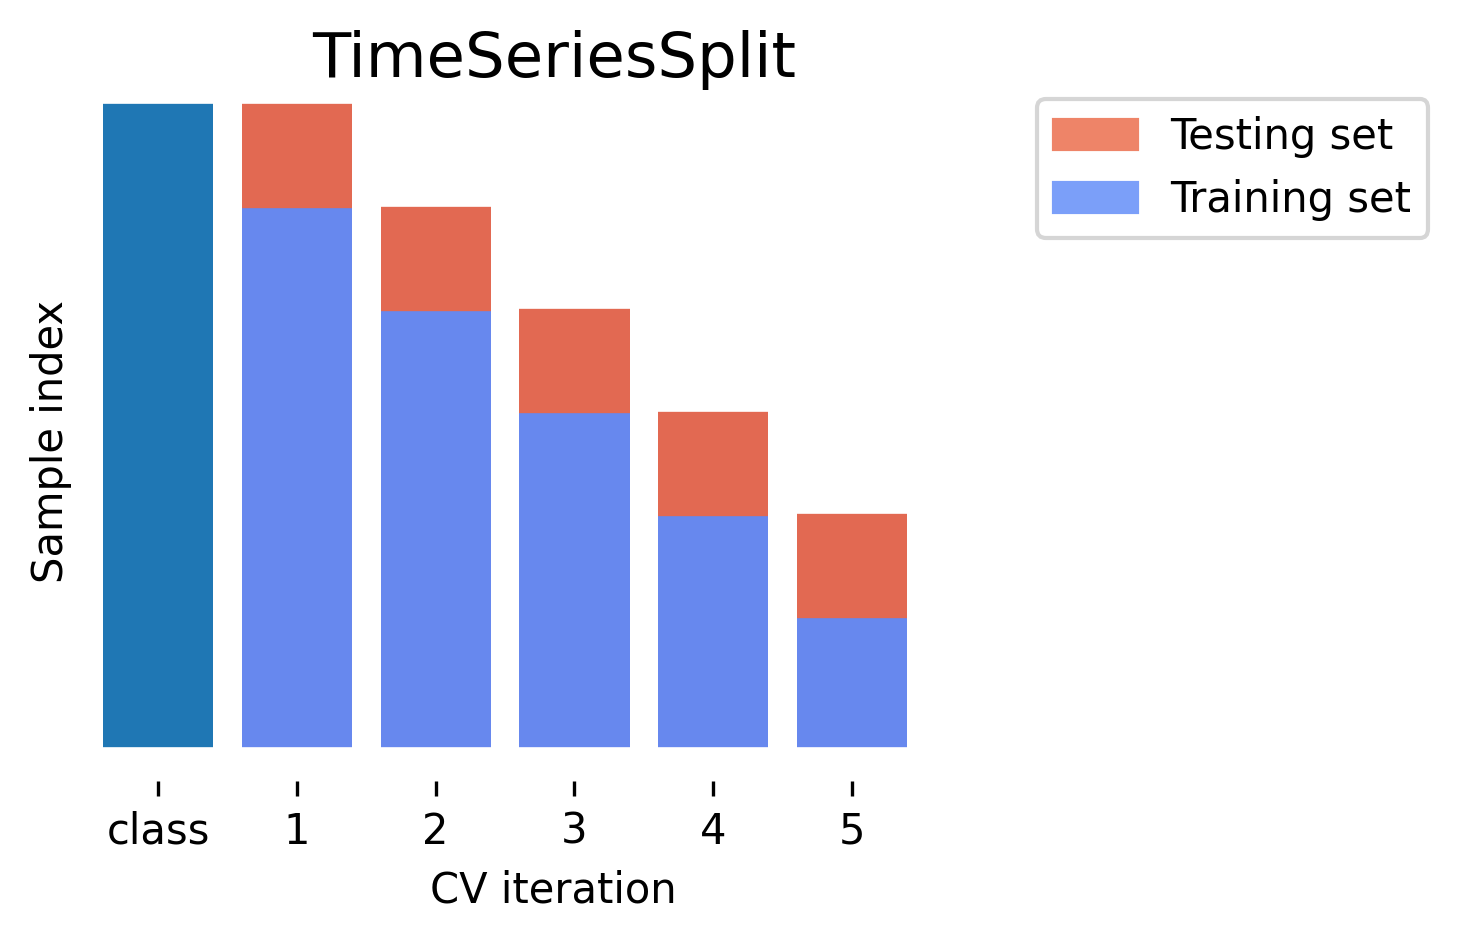

In [36]:
from random import *
fig, ax = plt.subplots(figsize=(4, 3))
cv = TimeSeriesSplit(5)
plot_cv_indices(cv, X, shuffle(y), groups, ax, s=700, lw=2)
ax.set_ylim((-6, 100))
plt.savefig("images/time_series_cv.png")

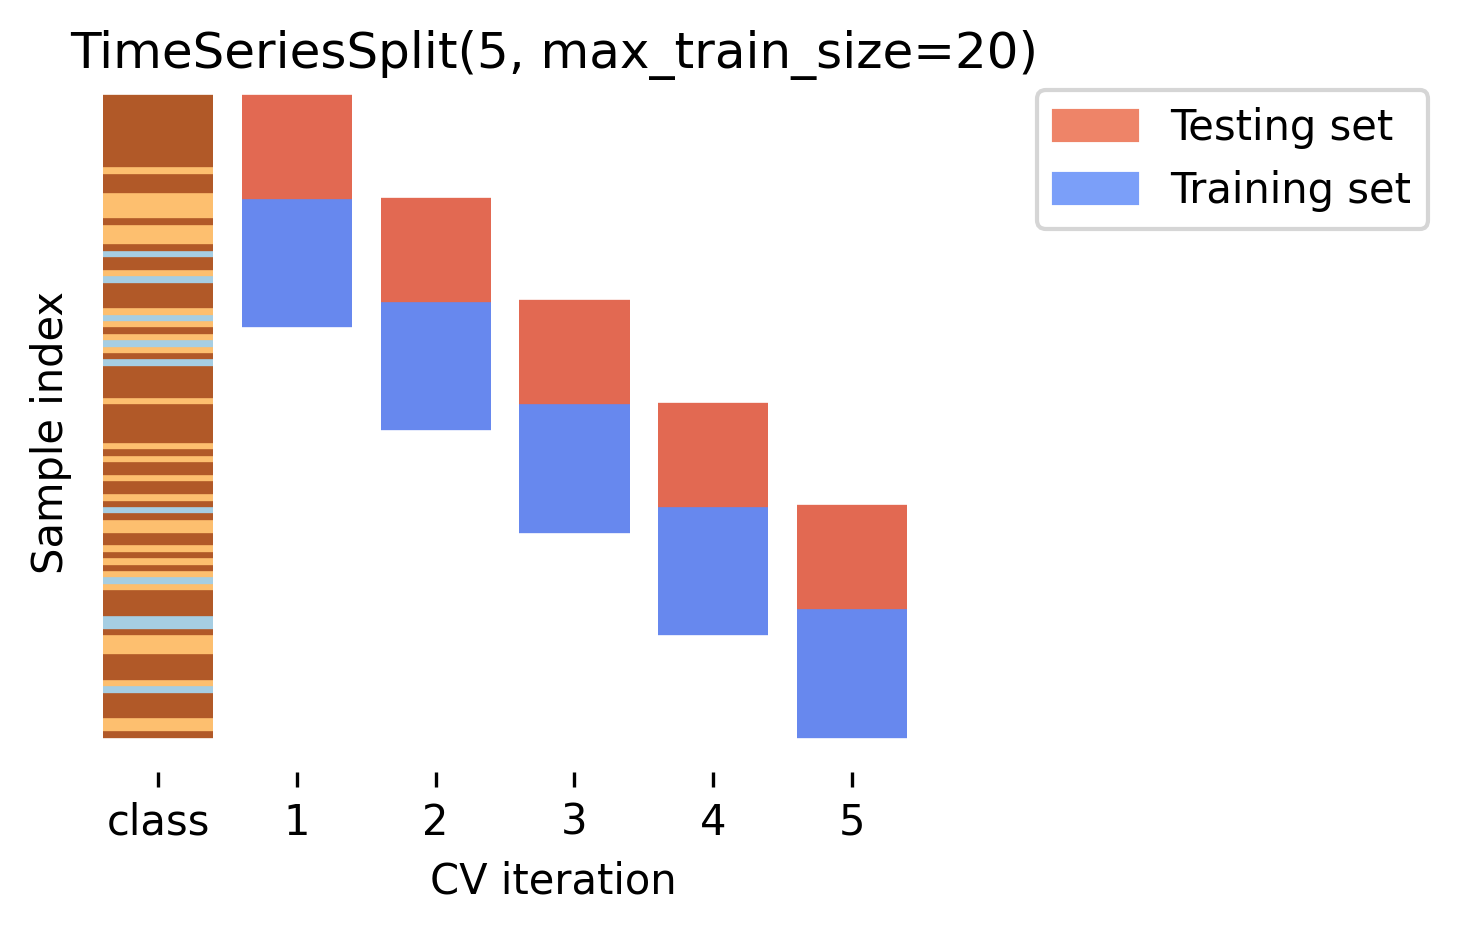

In [37]:
from sklearn.utils import shuffle
fig, ax = plt.subplots(figsize=(4, 3))
cv = TimeSeriesSplit(5, max_train_size=20)
plot_cv_indices(cv, X, shuffle(y), groups, ax, s=700, lw=2)
ax.set_ylim((-6, 100))
ax.set_title("TimeSeriesSplit(5, max_train_size=20)")
plt.savefig("images/time_series_walk_forward_cv.png")

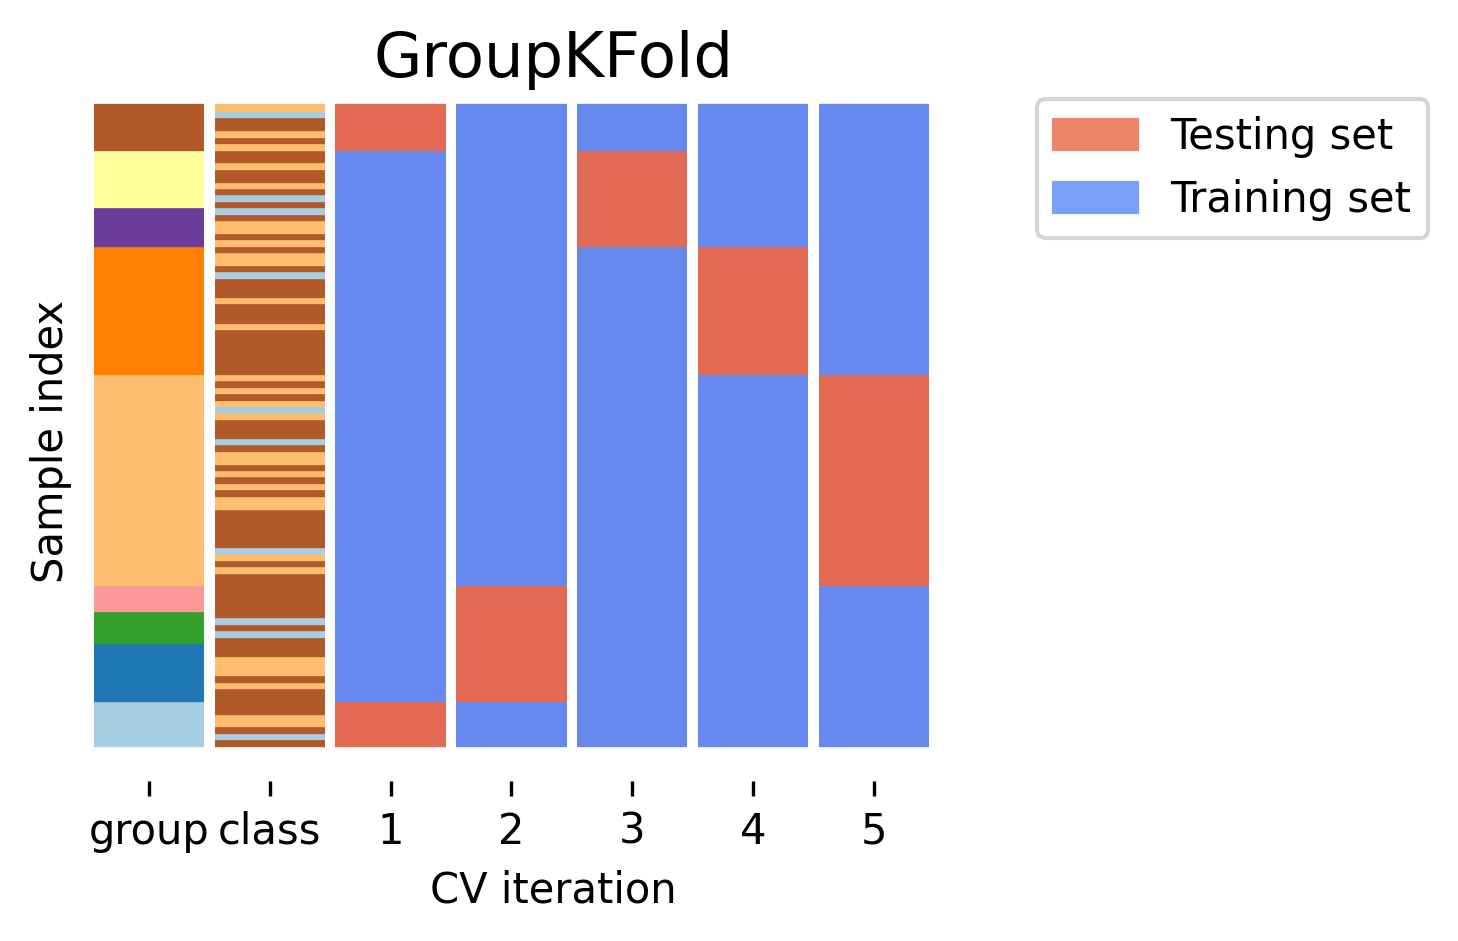

In [38]:
fig, ax = plt.subplots(figsize=(4, 3))
cv = GroupKFold(5)
plot_cv_indices(cv, X, y, groups, ax, s=700, show_groups=True)
ax.set_ylim((-6, 100))
plt.savefig("images/group_kfold.png")

In [39]:
np.set_printoptions(precision=2)

In [40]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

print("KFold:\n",
      cross_val_score(KNeighborsClassifier(), X, y, cv=kfold))

print("StratifiedKFold:\n",
      cross_val_score(KNeighborsClassifier(), X, y, cv=skfold))

print("ShuffleSplit:\n",
      cross_val_score(KNeighborsClassifier(), X, y, cv=ss))

print("RepeatedStratifiedKFold:\n",
      cross_val_score(KNeighborsClassifier(), X, y, cv=rs))

KFold:
 [0.5  0.6  0.35 0.65 0.55]
StratifiedKFold:
 [0.55 0.55 0.6  0.45 0.5 ]
ShuffleSplit:
 [0.33 0.43 0.47 0.47 0.5  0.47 0.43 0.57 0.53 0.47 0.63 0.6  0.5  0.57
 0.53 0.4  0.47 0.4  0.4  0.47]
RepeatedStratifiedKFold:
 [0.55 0.5  0.45 0.5  0.35 0.6  0.6  0.5  0.6  0.55 0.45 0.45 0.5  0.6
 0.5  0.5  0.55 0.6  0.55 0.5  0.55 0.55 0.5  0.5  0.75 0.6  0.45 0.6
 0.55 0.3  0.7  0.65 0.5  0.35 0.5  0.45 0.6  0.75 0.55 0.7  0.45 0.45
 0.55 0.4  0.65 0.45 0.5  0.55 0.6  0.55]


# GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(X_train, y_train)
print(f"best parameters: {grid.best_params_}")

print(f"test-set score: {grid.score(X_test, y_test):.3f}")


/home/ptracton/COMS4995-s20/coms/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


best parameters: {'n_neighbors': 1}
test-set score: 0.480


/home/ptracton/COMS4995-s20/coms/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [43]:
results.params

0      {'n_neighbors': 1}
1      {'n_neighbors': 3}
2      {'n_neighbors': 5}
3      {'n_neighbors': 7}
4      {'n_neighbors': 9}
5     {'n_neighbors': 11}
6     {'n_neighbors': 13}
7     {'n_neighbors': 15}
8     {'n_neighbors': 17}
9     {'n_neighbors': 19}
10    {'n_neighbors': 21}
11    {'n_neighbors': 23}
12    {'n_neighbors': 25}
13    {'n_neighbors': 27}
14    {'n_neighbors': 29}
Name: params, dtype: object

In [44]:
len(results)

15

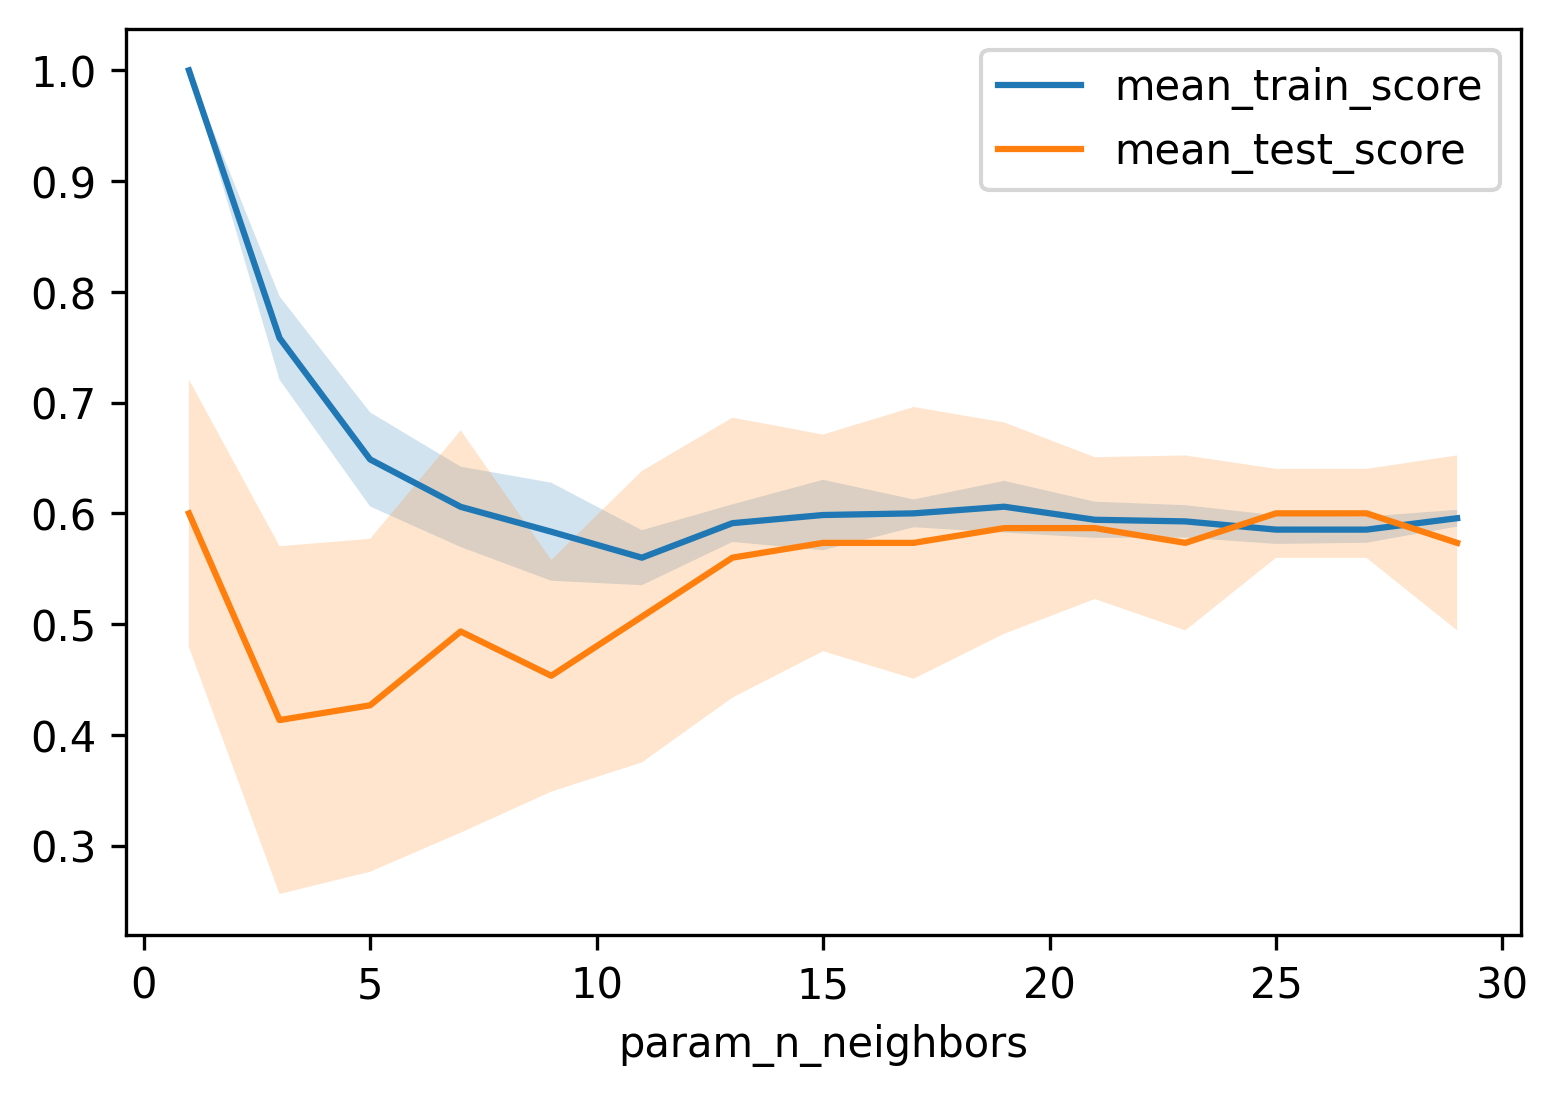

In [45]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.savefig("images/grid_search_n_neighbors.png", bbox_inches='tight')

In [47]:
from sklearn.model_selection import cross_validate
#res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True,
#                    scoring=["accuracy", "roc_auc"])
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True,
                    scoring=["accuracy"])

res_df = pd.DataFrame(res)
res_df

/home/ptracton/COMS4995-s20/coms/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,fit_time,score_time,test_accuracy,train_accuracy
0,0.000698,0.000817,0.617647,0.651515
1,0.000346,0.000725,0.515152,0.701493
2,0.000337,0.000740,0.575758,0.686567
